# Customer Rentation Project

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Problem Statement:

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

Since the dataset do not contains target/dependent variable, hence we can consider this as unsupervised learning

- importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Importing Dataset
# Reading the excel file
df = pd.read_excel("customer_retention_dataset.xlsx")
pd.set_option("display.max_columns",None)
df.head(5)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [3]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

Columns are too much descriptive, we want ot to be short so that we can call columns if need easily.

The dataset contains both numerical,categorical and alphanumerical data.

This dataset contains the data of customers who shop online too much frequently.

In [5]:
#check the shape of data
df.shape

(269, 71)

71 columns, which a lot of em, we have to trim the column names.

In [4]:
# Renaming the column names for better understanding
columns = ['Gender','Age','City','Pincode','Shopping_Since','Shopping_Frequency','Internet_connection','Access_Device',
           'Screen_Size','OS', 'Browser_Used','Medium','Access_On','Time_Spend','Payment_Mode','Abandon_Habit',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support_Response',
          'Customer_Privacy_Guarantee','Various_Channel_Responses','Benefits','Enjoy','Convenience','Return_Replacement_Policy','Loyalty_Programs_Access',
          'Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Product_Several_Category','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_Web_App',
           'Visually_Appealing_WebApp','Product_Variety','Complete_Product_Info','Fast_WebApp','Reliable_WebApp','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy_Info','Financial_Security_Info','Perceived_Trustworthiness','Multichannel_Assistance','Long_Login_Time','Long_Display_Time',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','WebApp_Design_Change','Page_Disruption','WebApp_Efficiency',
           'Recommendation']

df.columns = columns

In [5]:
#altering the column names
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since',
       'Shopping_Frequency', 'Internet_connection', 'Access_Device',
       'Screen_Size', 'OS', 'Browser_Used', 'Medium', 'Access_On',
       'Time_Spend', 'Payment_Mode', 'Abandon_Habit', 'Abandon_Reason',
       'Content_Readability', 'Similar_Product_Info', 'Seller_Product_Info',
       'Product_Info_Clarity', 'Navigation_Ease', 'Loading_Processing_Speed',
       'User_Friendly_Interface', 'Convenient_Payment_Mode',
       'Timely_Fulfilment_Trust', 'Customer_Support_Response',
       'Customer_Privacy_Guarantee', 'Various_Channel_Responses', 'Benefits',
       'Enjoy', 'Convenience', 'Return_Replacement_Policy',
       'Loyalty_Programs_Access', 'Info_Satisfaction',
       'Site_Quality_Satisfaction', 'Net_Benefit_Satisfaction', 'Trust',
       'Product_Several_Category', 'Relevant_Product_Info', 'Monetary_Savings',
       'Patronizing_Convenience', 'Adventure_Sense', 'Social_Status',
       'Gratification', 'Role_Fulfil

In [8]:
#check for Null values
df.isnull().sum()

Gender                  0
Age                     0
City                    0
Pincode                 0
Shopping_Since          0
                       ..
Late_Delivery           0
WebApp_Design_Change    0
Page_Disruption         0
WebApp_Efficiency       0
Recommendation          0
Length: 71, dtype: int64

In [16]:
#lets check the data type of columns
df.dtypes

Gender                  object
Age                     object
City                    object
Pincode                  int64
Shopping_Since          object
                         ...  
Late_Delivery           object
WebApp_Design_Change    object
Page_Disruption         object
WebApp_Efficiency       object
Recommendation          object
Length: 71, dtype: object

most of the datatypes are object

In [9]:
#check the entries from each column
for col in df.columns:
        print(df[col].value_counts())
        print()

Female    181
Male       88
Name: Gender, dtype: int64

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64

201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
203207     1
560001     1
203202     1
Name: Pincode, dtype: int64

Above 4 year

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Multichannel_Assistance, dtype: int64

Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                           

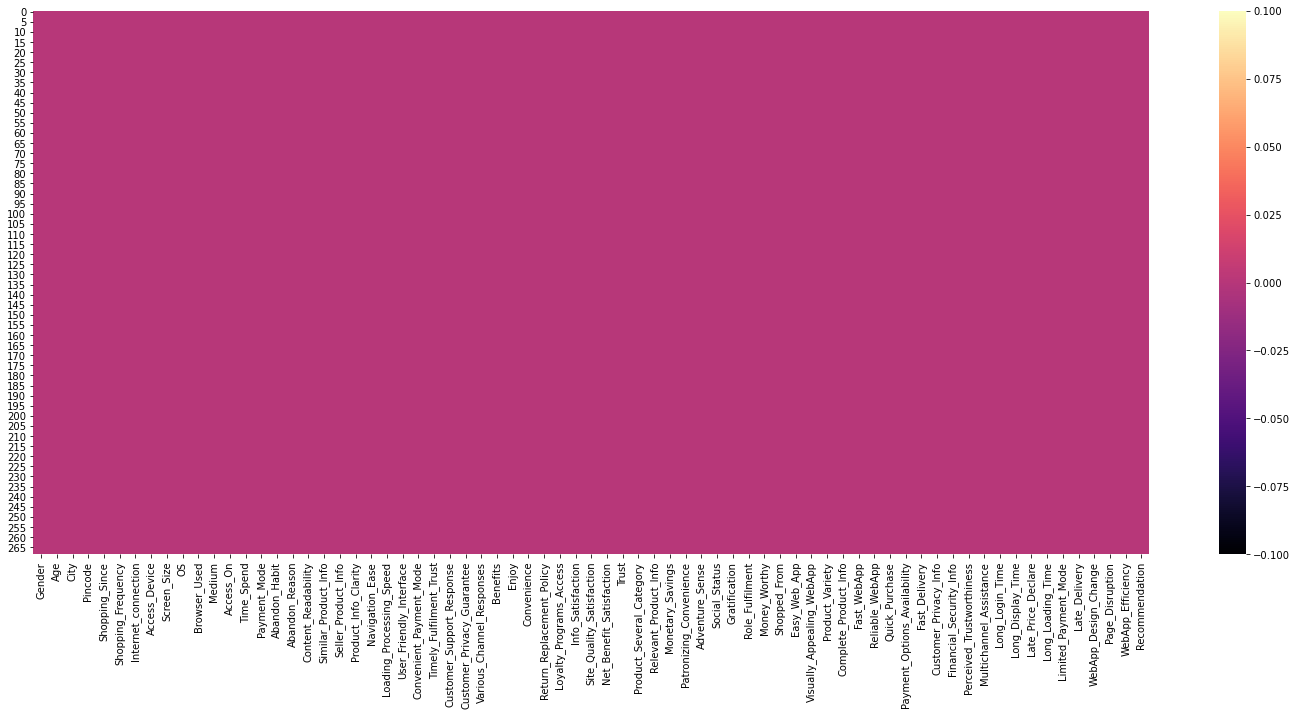

In [22]:
# Let's visualize the null values clearly
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),cmap="magma")
plt.show()

In [6]:
#As pin code represent address, we will convert it into object data type
df['Pincode'] = df['Pincode'].astype("object")

In [7]:
# In column How do you access the internet while shopping on-line I observed two categories, Mobile internet and Mobile Internet
#lets combine these two
df['Internet_connection'].replace('Mobile Internet','Mobile internet', inplace = True)

Female    181
Male       88
Name: Gender, dtype: int64


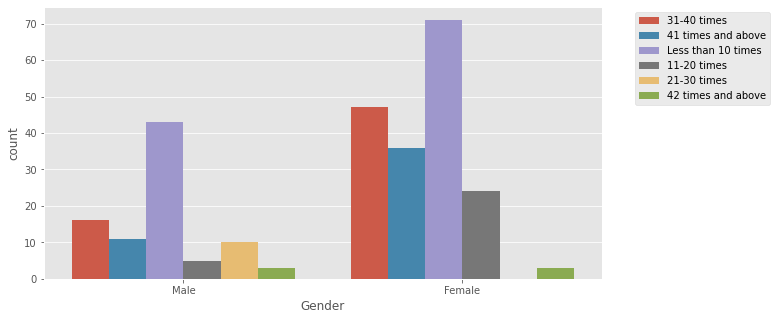

In [28]:
#lets have a look on gender of customer
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
sns.countplot(df['Gender'], hue = df['Shopping_Frequency'])
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
print(df['Gender'].value_counts())
plt.show()

Female surf much more than male, uit also depicts that female are intend to buy more products than male.

# Pie Plot

Pie plot for the column: Age
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


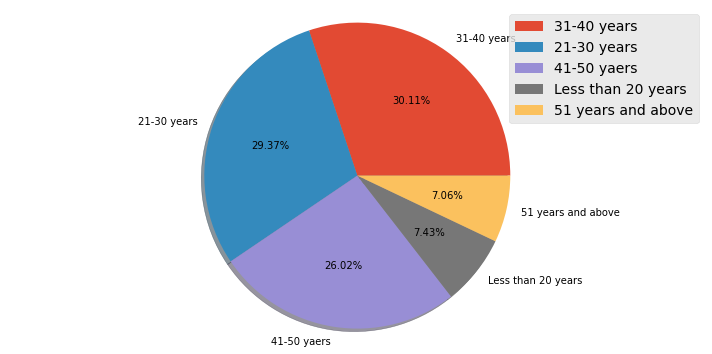

*****************************************************************************************************************************
Pie plot for the column: Internet_connection
Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: Internet_connection, dtype: int64


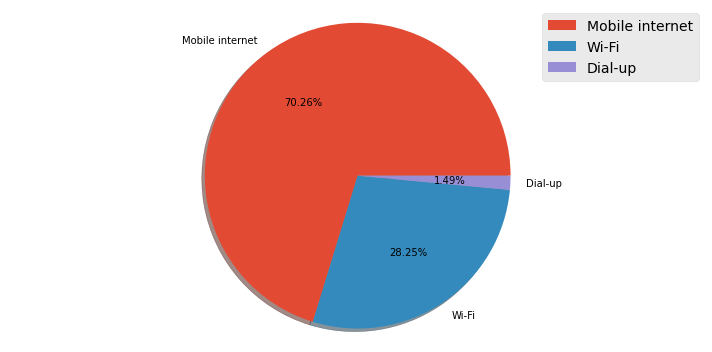

*****************************************************************************************************************************
Pie plot for the column: OS
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


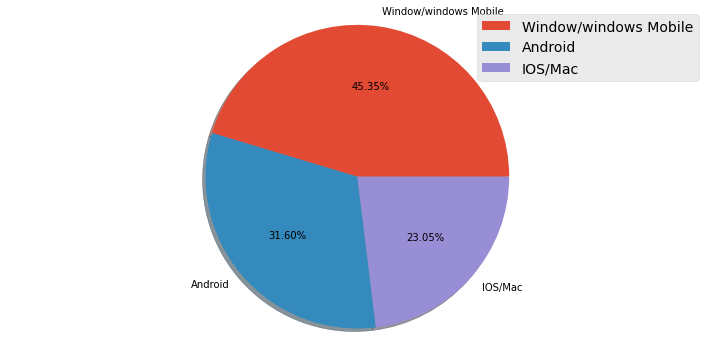

*****************************************************************************************************************************
Pie plot for the column: Medium
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Medium, dtype: int64


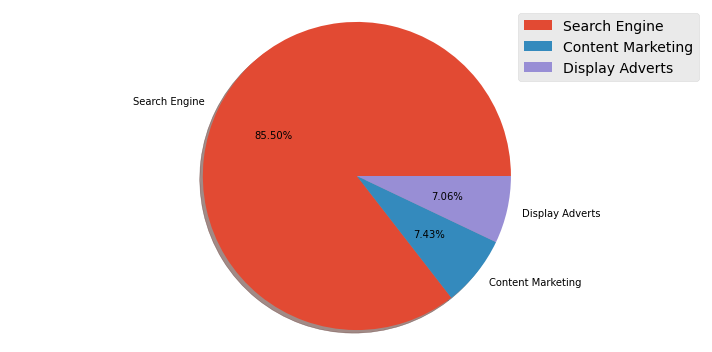

*****************************************************************************************************************************
Pie plot for the column: Payment_Mode
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Payment_Mode, dtype: int64


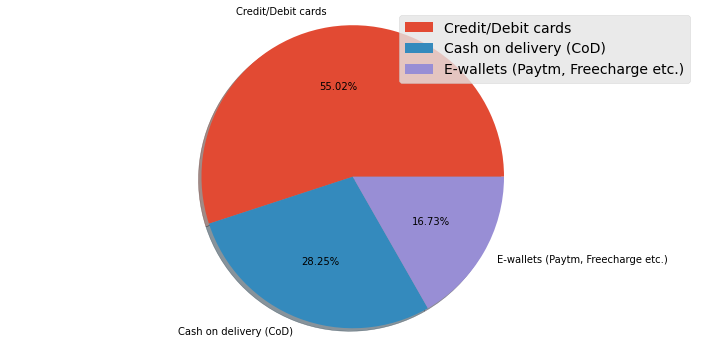

*****************************************************************************************************************************
Pie plot for the column: Convenient_Payment_Mode
Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient_Payment_Mode, dtype: int64


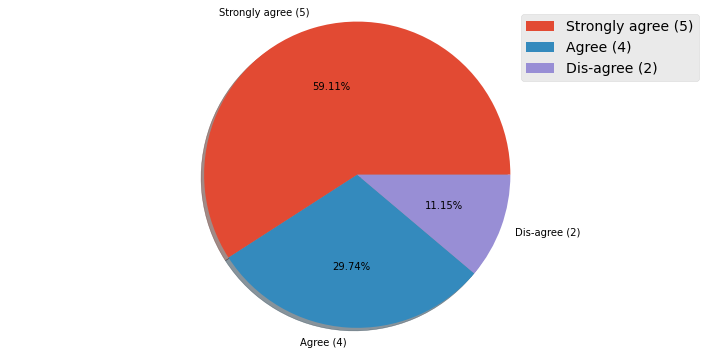

*****************************************************************************************************************************
Pie plot for the column: Customer_Privacy_Guarantee
Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: Customer_Privacy_Guarantee, dtype: int64


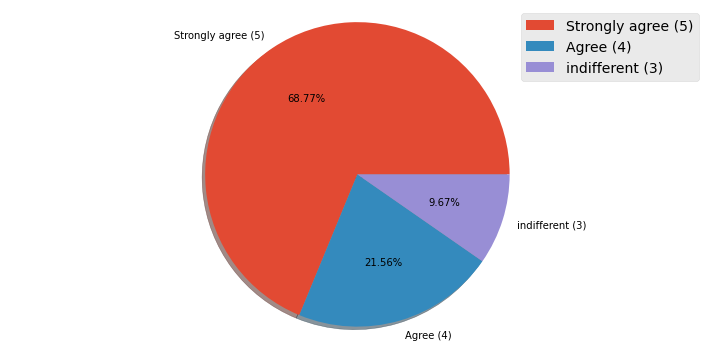

*****************************************************************************************************************************
Pie plot for the column: Benefits
Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: Benefits, dtype: int64


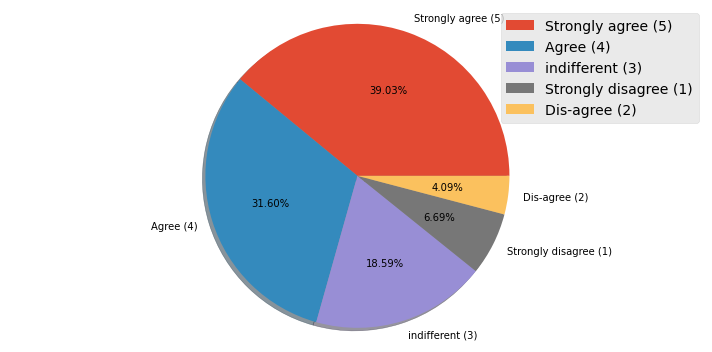

*****************************************************************************************************************************
Pie plot for the column: Enjoy
Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: Enjoy, dtype: int64


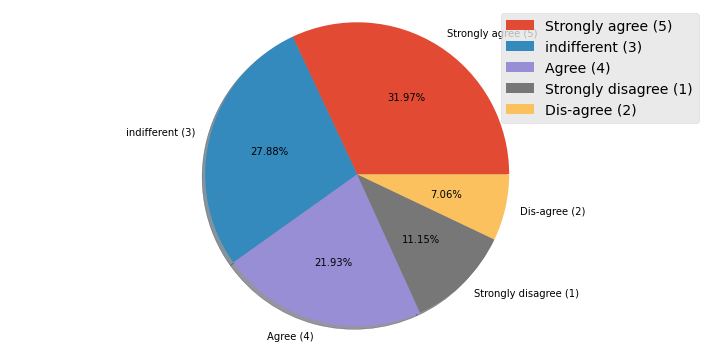

*****************************************************************************************************************************
Pie plot for the column: Return_Replacement_Policy
Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return_Replacement_Policy, dtype: int64


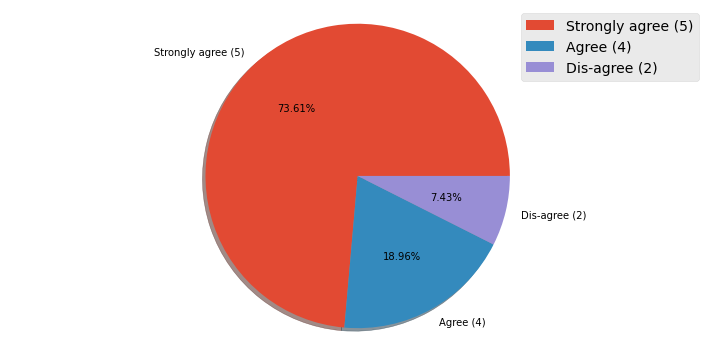

*****************************************************************************************************************************
Pie plot for the column: Loyalty_Programs_Access
Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: Loyalty_Programs_Access, dtype: int64


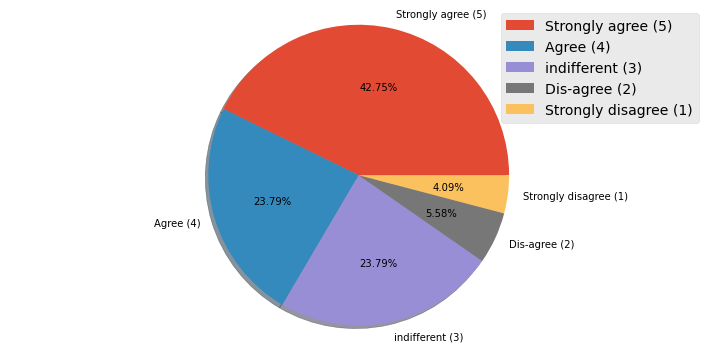

*****************************************************************************************************************************
Pie plot for the column: Info_Satisfaction
Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: Info_Satisfaction, dtype: int64


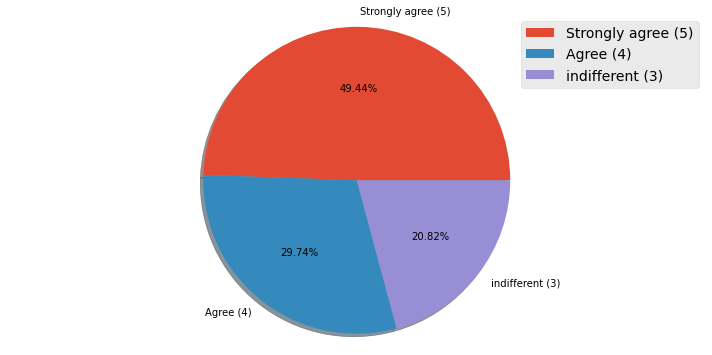

*****************************************************************************************************************************
Pie plot for the column: Site_Quality_Satisfaction
Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: Site_Quality_Satisfaction, dtype: int64


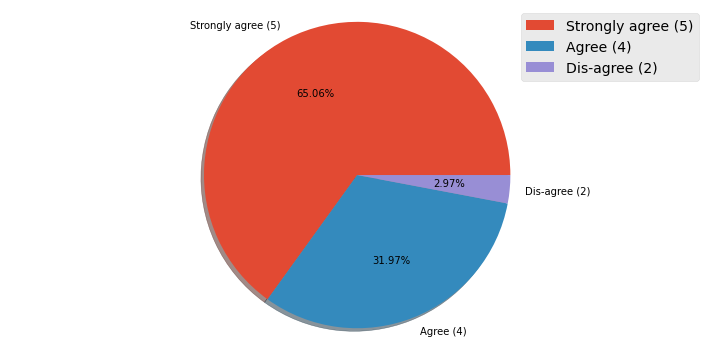

*****************************************************************************************************************************
Pie plot for the column: Net_Benefit_Satisfaction
Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: Net_Benefit_Satisfaction, dtype: int64


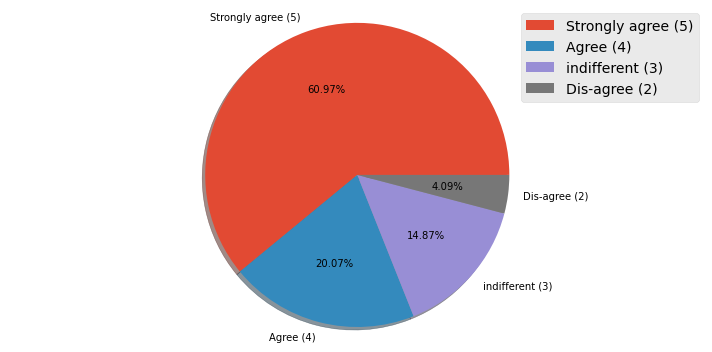

*****************************************************************************************************************************
Pie plot for the column: Trust
Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: Trust, dtype: int64


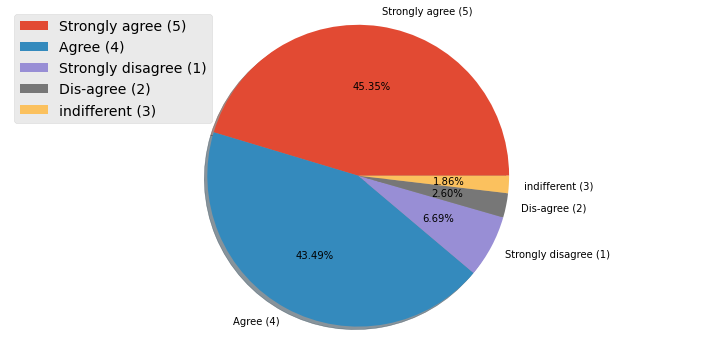

*****************************************************************************************************************************
Pie plot for the column: Monetary_Savings
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: Monetary_Savings, dtype: int64


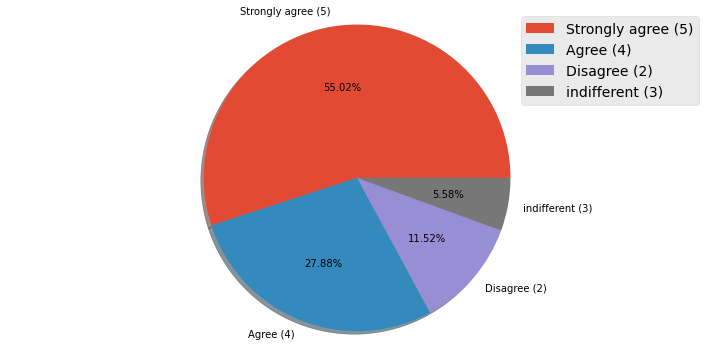

*****************************************************************************************************************************
Pie plot for the column: Patronizing_Convenience
Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: Patronizing_Convenience, dtype: int64


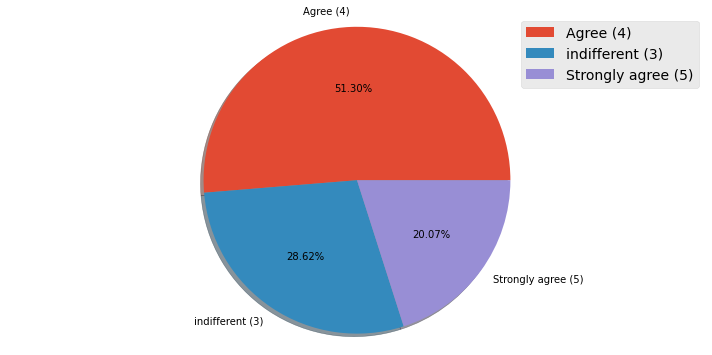

*****************************************************************************************************************************
Pie plot for the column: Adventure_Sense
Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: Adventure_Sense, dtype: int64


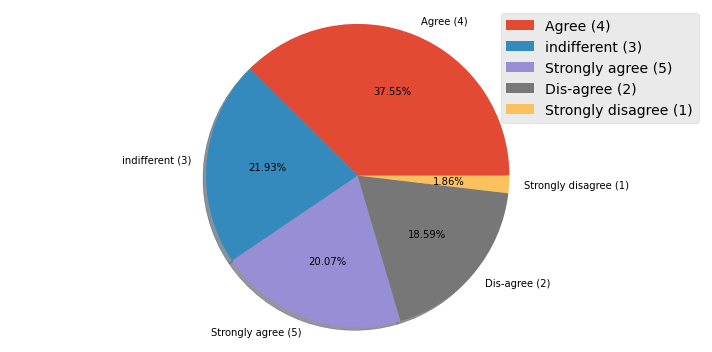

*****************************************************************************************************************************
Pie plot for the column: Social_Status
indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: Social_Status, dtype: int64


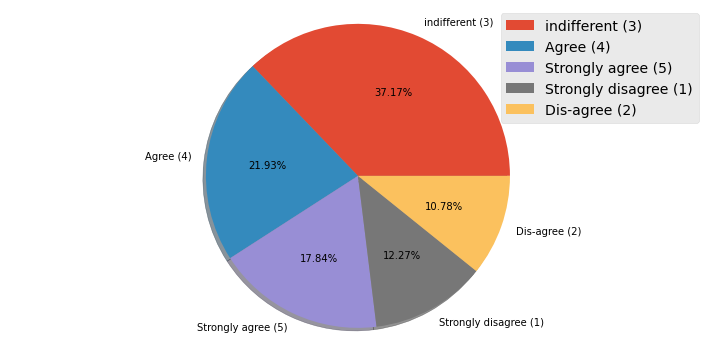

*****************************************************************************************************************************
Pie plot for the column: Gratification
indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: Gratification, dtype: int64


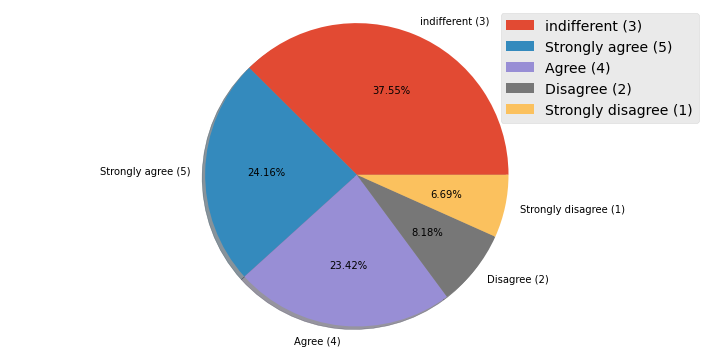

*****************************************************************************************************************************
Pie plot for the column: Money_Worthy
Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: Money_Worthy, dtype: int64


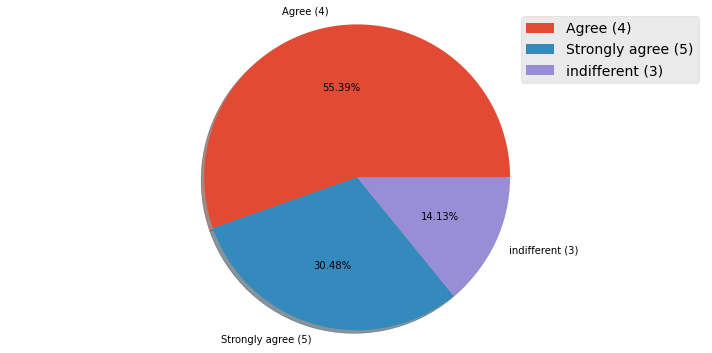

*****************************************************************************************************************************


In [42]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['Age', 'Internet_connection','OS','Medium', 'Payment_Mode','Convenient_Payment_Mode','Customer_Privacy_Guarantee','Benefits','Enjoy','Return_Replacement_Policy','Loyalty_Programs_Access','Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Monetary_Savings','Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Money_Worthy']

plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    print(df[j].value_counts())
    generate_pie(df[j])
    print("*"*125)

# Count Plot

In [43]:
def value_count(column):
    counts=len(df[column].value_counts())
    if counts<5:
        plt.figure(figsize=(10,6))
    elif counts<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=df,palette="mako")
    plt.show()
    print("*"*125)

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64


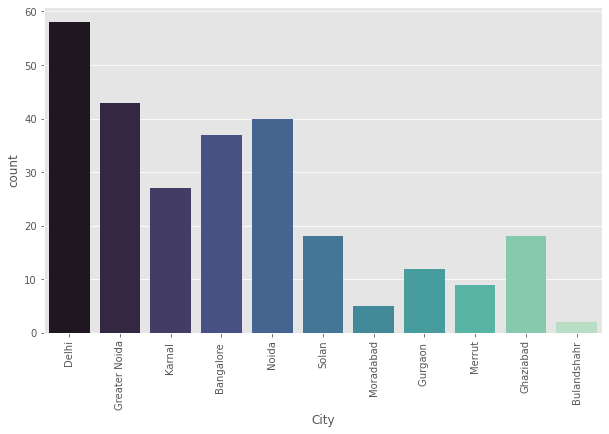

*****************************************************************************************************************************
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping_Since, dtype: int64


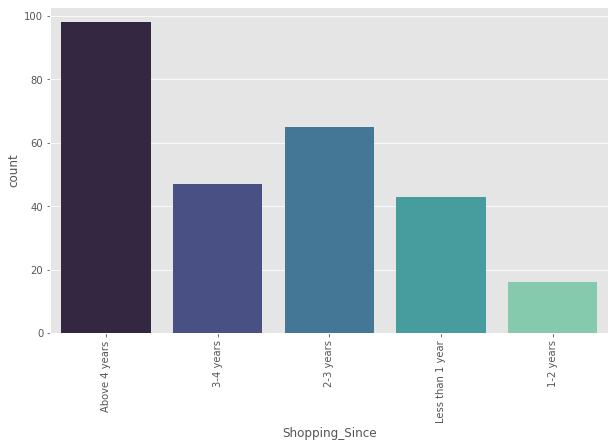

*****************************************************************************************************************************
Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: Shopping_Frequency, dtype: int64


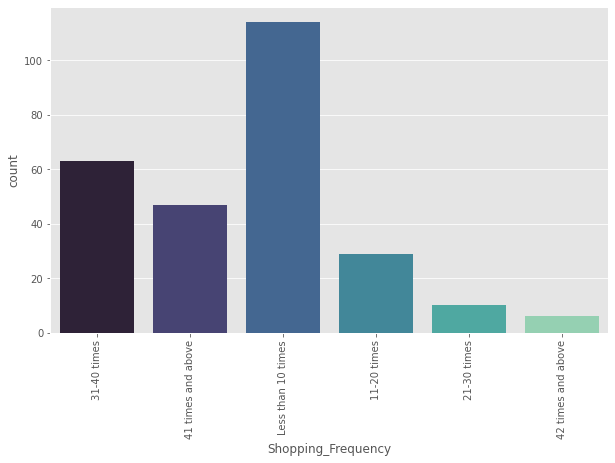

*****************************************************************************************************************************
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Access_Device, dtype: int64


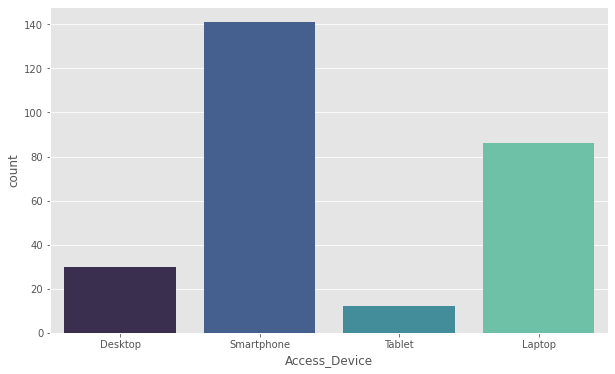

*****************************************************************************************************************************
Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: Screen_Size, dtype: int64


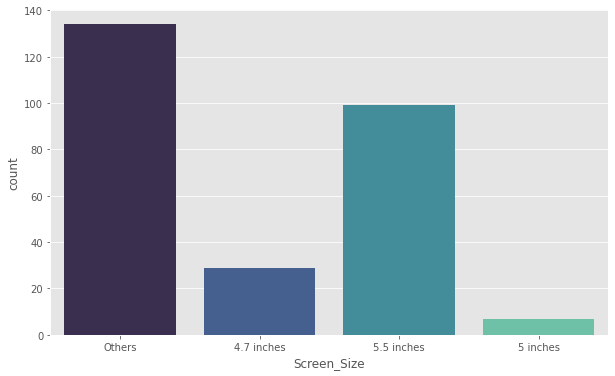

*****************************************************************************************************************************
Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: Browser_Used, dtype: int64


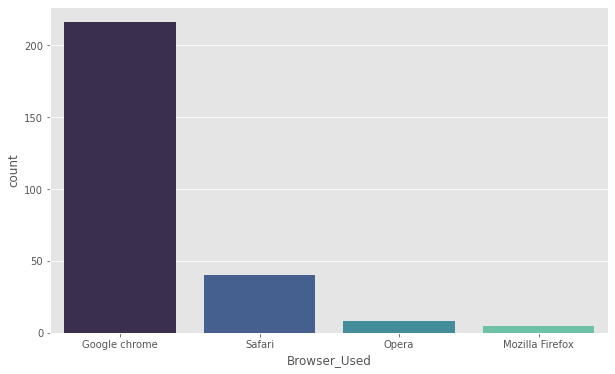

*****************************************************************************************************************************
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Access_On, dtype: int64


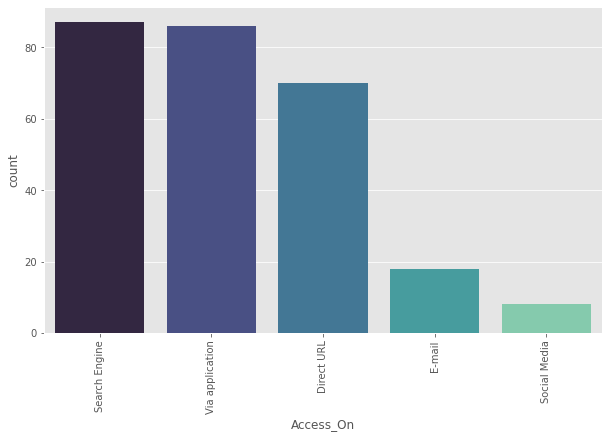

*****************************************************************************************************************************
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: Time_Spend, dtype: int64


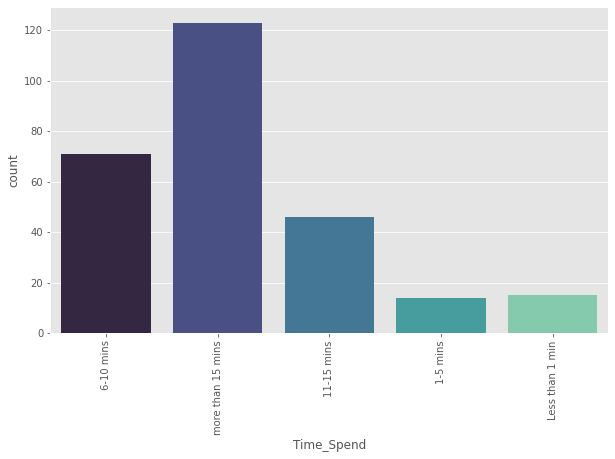

*****************************************************************************************************************************
Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: Abandon_Habit, dtype: int64


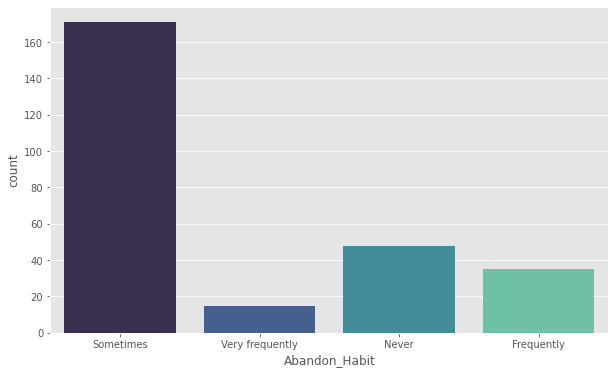

*****************************************************************************************************************************
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Abandon_Reason, dtype: int64


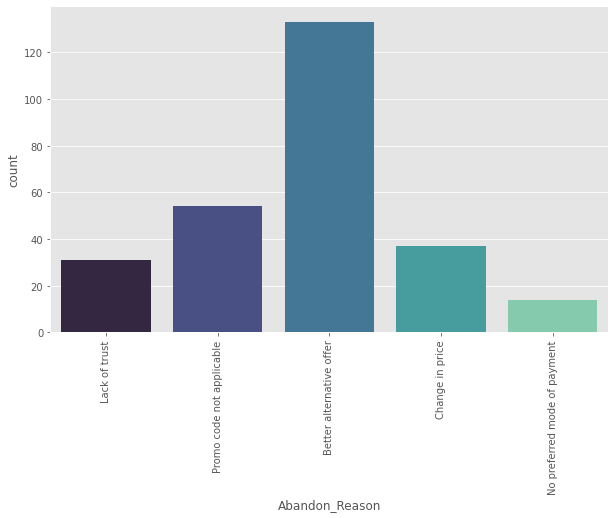

*****************************************************************************************************************************
Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: Content_Readability, dtype: int64


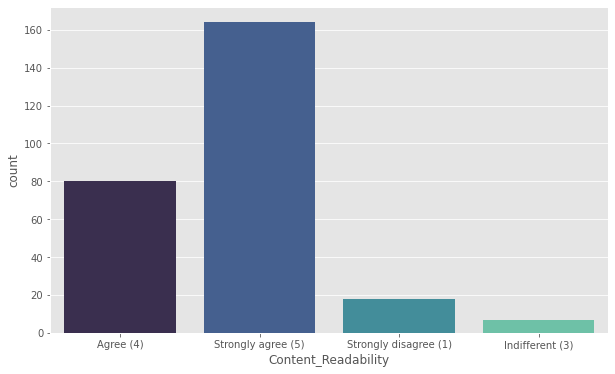

*****************************************************************************************************************************
Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: Similar_Product_Info, dtype: int64


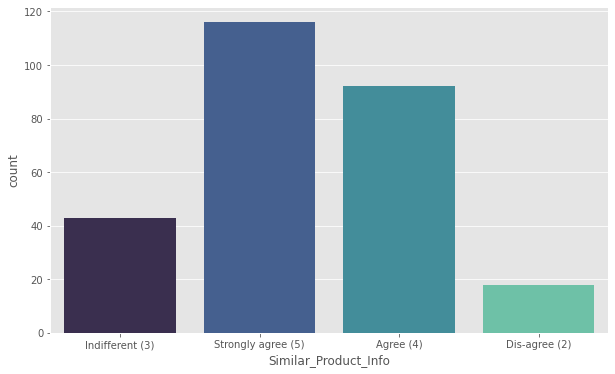

*****************************************************************************************************************************
Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: Seller_Product_Info, dtype: int64


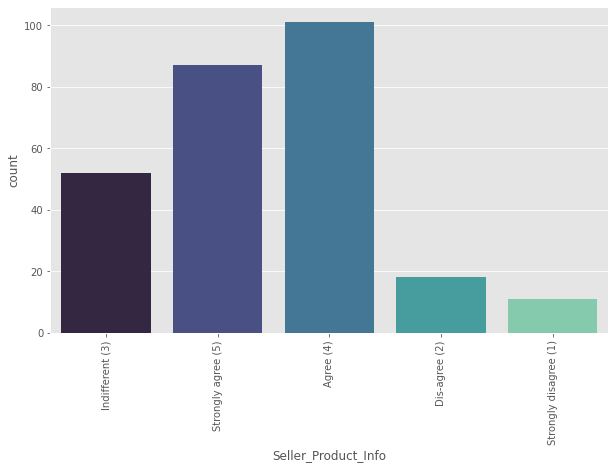

*****************************************************************************************************************************
Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: Product_Info_Clarity, dtype: int64


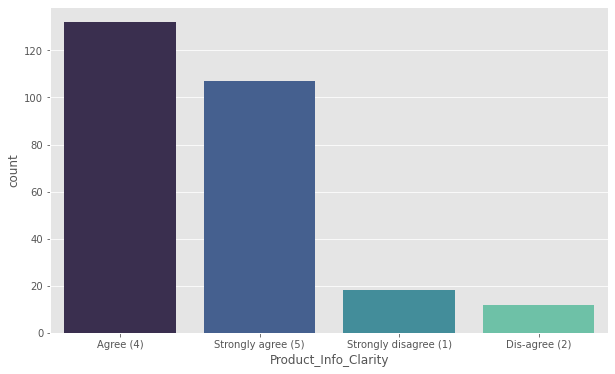

*****************************************************************************************************************************
Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: Navigation_Ease, dtype: int64


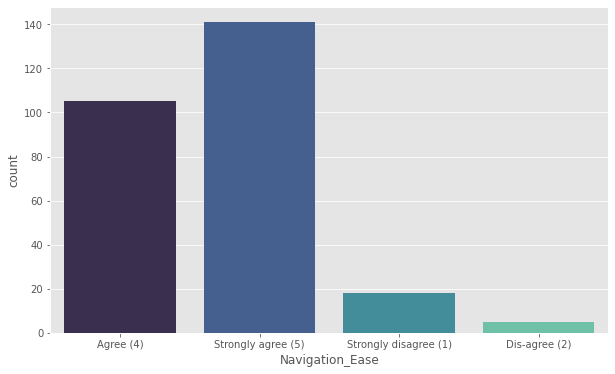

*****************************************************************************************************************************
Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Indifferent (3)           12
Strongly disagree (1)     12
Name: Loading_Processing_Speed, dtype: int64


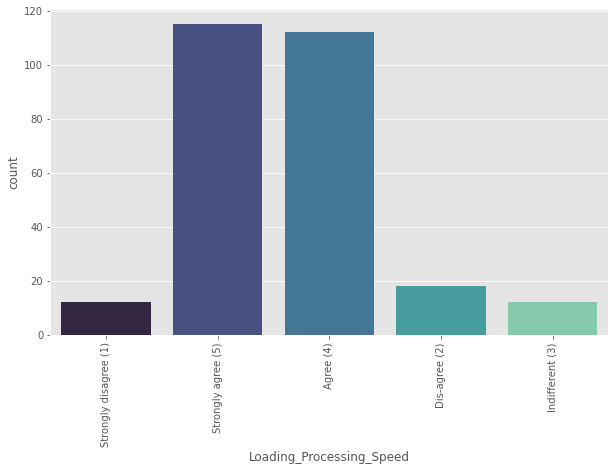

*****************************************************************************************************************************
Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User_Friendly_Interface, dtype: int64


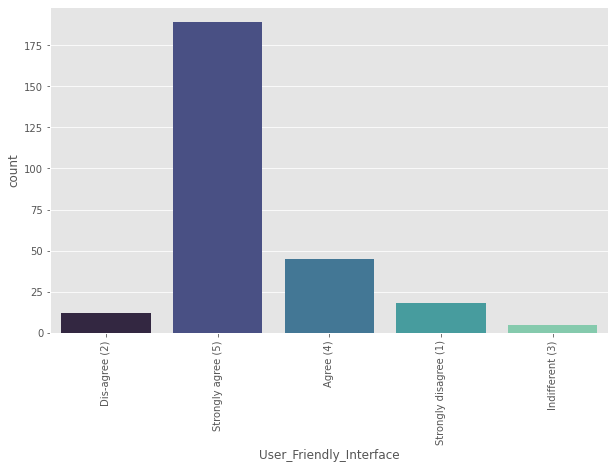

*****************************************************************************************************************************
Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: Timely_Fulfilment_Trust, dtype: int64


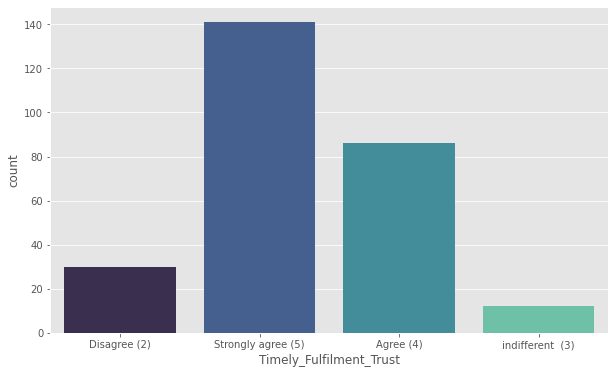

*****************************************************************************************************************************
Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Customer_Support_Response, dtype: int64


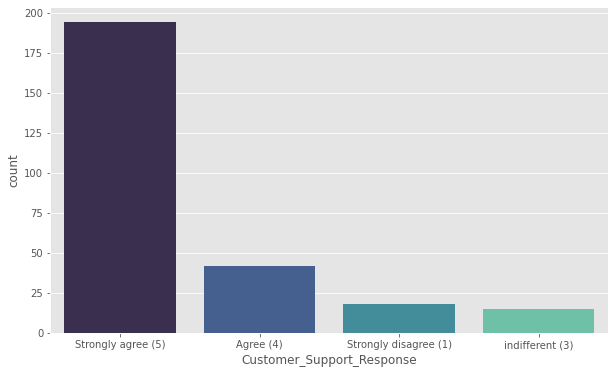

*****************************************************************************************************************************
Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Various_Channel_Responses, dtype: int64


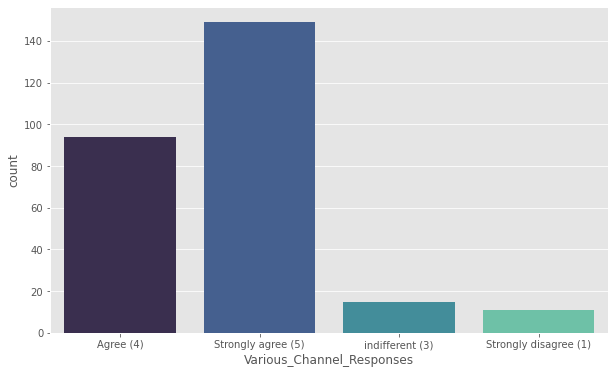

*****************************************************************************************************************************
Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: Convenience, dtype: int64


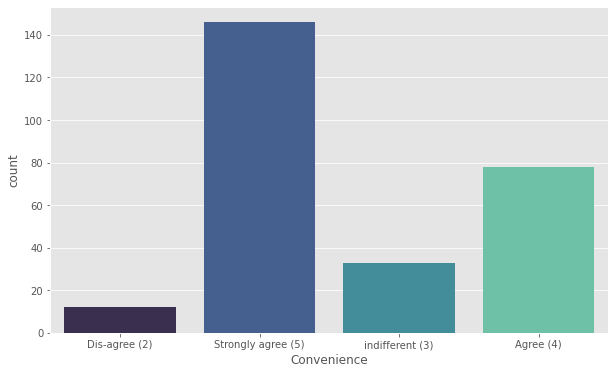

*****************************************************************************************************************************
Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: Product_Several_Category, dtype: int64


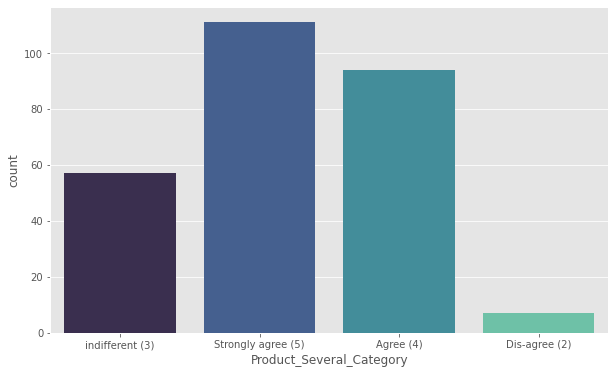

*****************************************************************************************************************************
Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: Relevant_Product_Info, dtype: int64


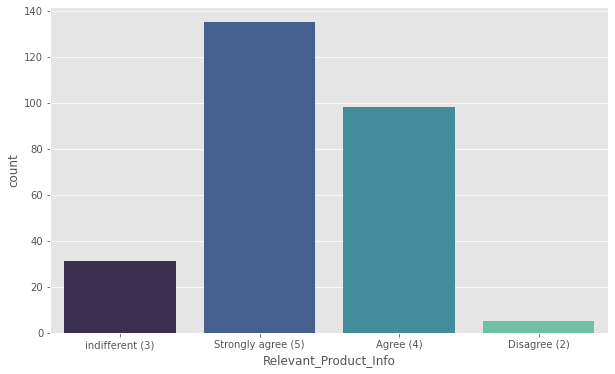

*****************************************************************************************************************************
Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: Role_Fulfilment, dtype: int64


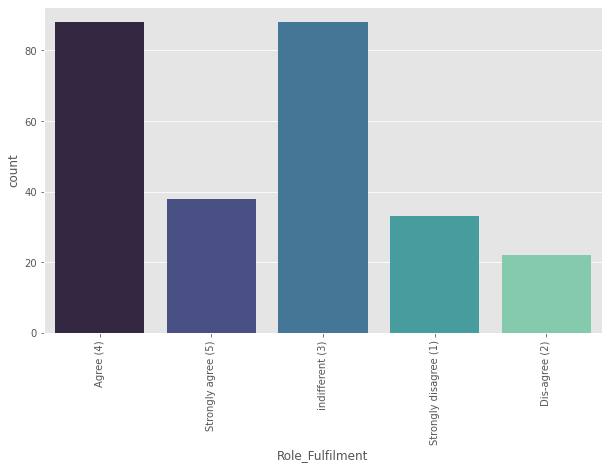

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: Shopped_From, dtype: int64


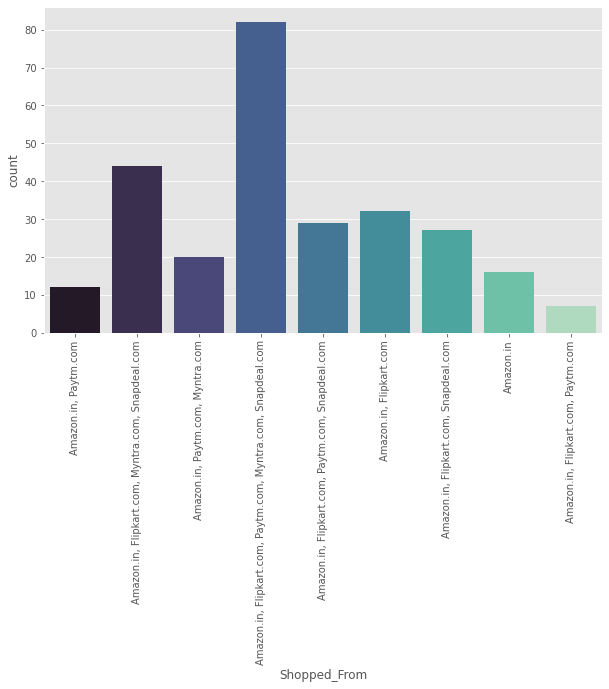

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy_Web_App, dtype: int64


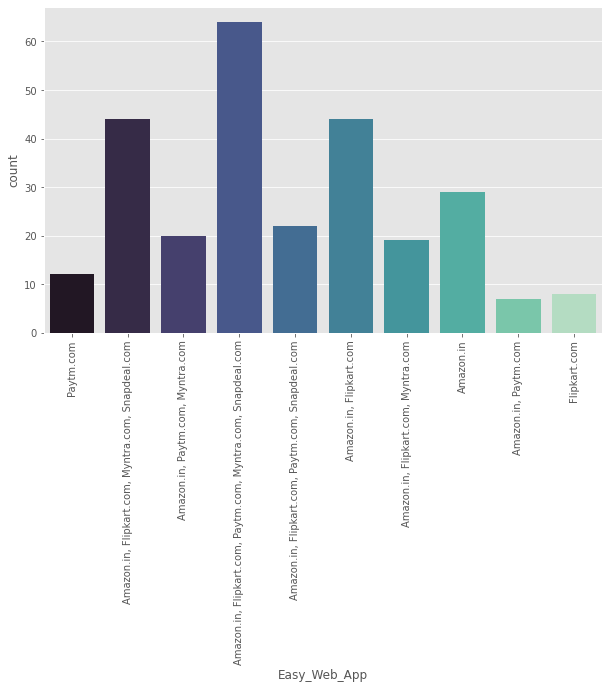

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Flipkart.com, Myntra.com                                        15
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visually_Appealing_WebApp, dtype: int64


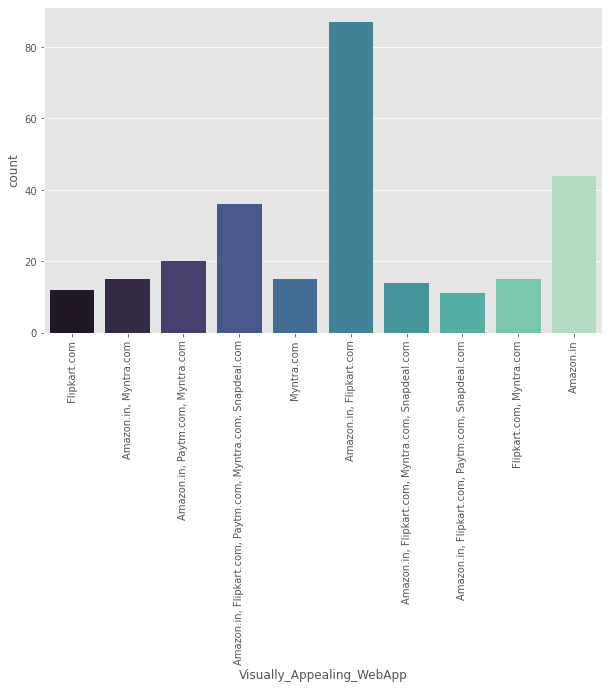

*****************************************************************************************************************************
Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Product_Variety, dtype: int64


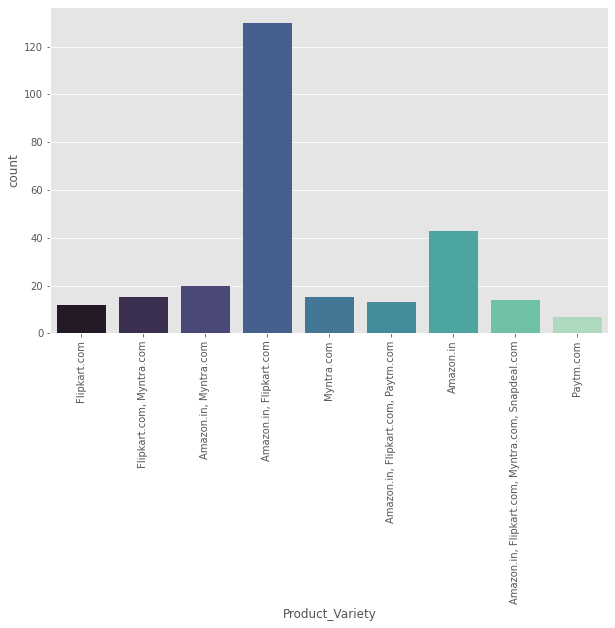

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete_Product_Info, dtype: int64


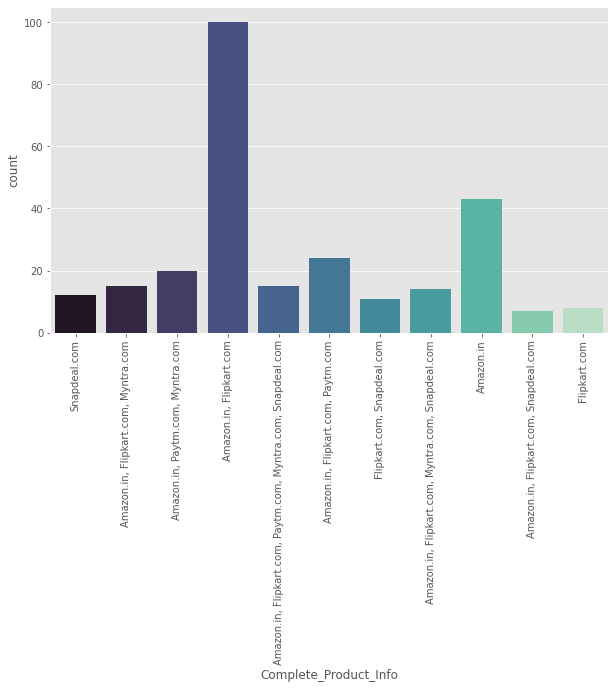

*****************************************************************************************************************************
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast_WebApp, dtype: int64


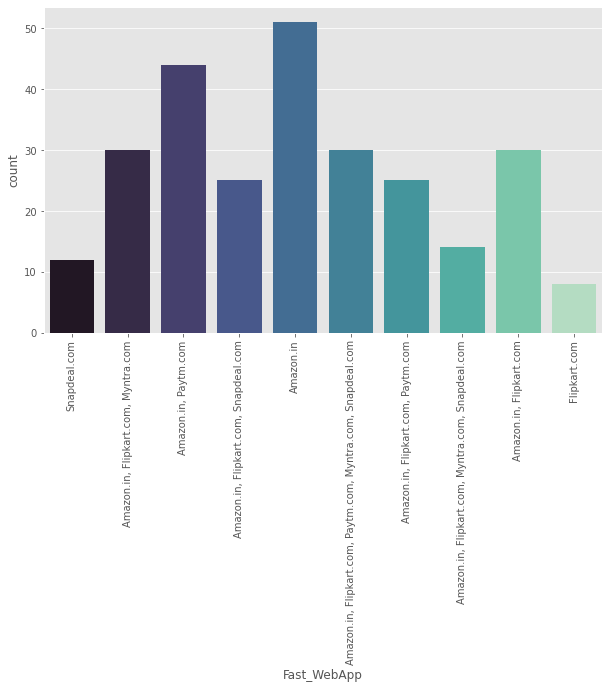

*****************************************************************************************************************************
Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliable_WebApp, dtype: int64


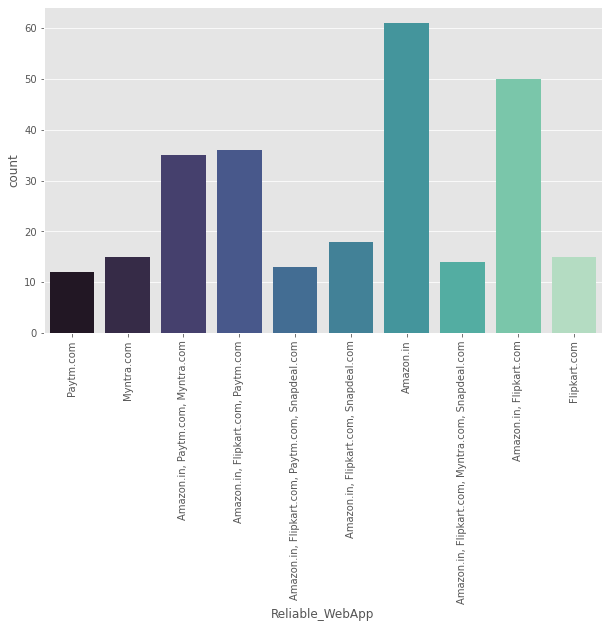

*****************************************************************************************************************************
Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quick_Purchase, dtype: int64


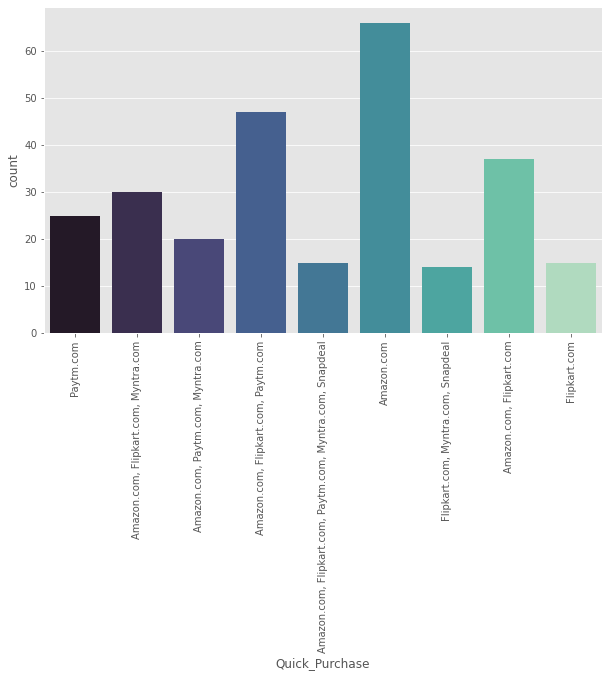

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Payment_Options_Availability, dtype: int64


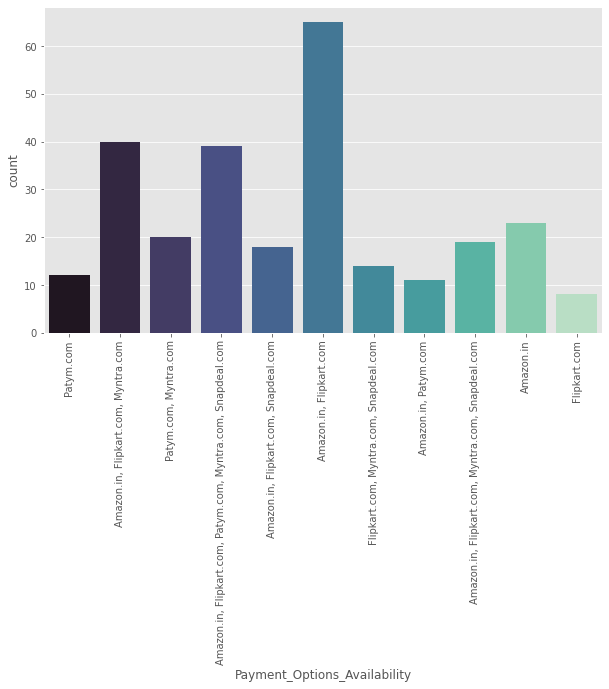

*****************************************************************************************************************************
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Fast_Delivery, dtype: int64


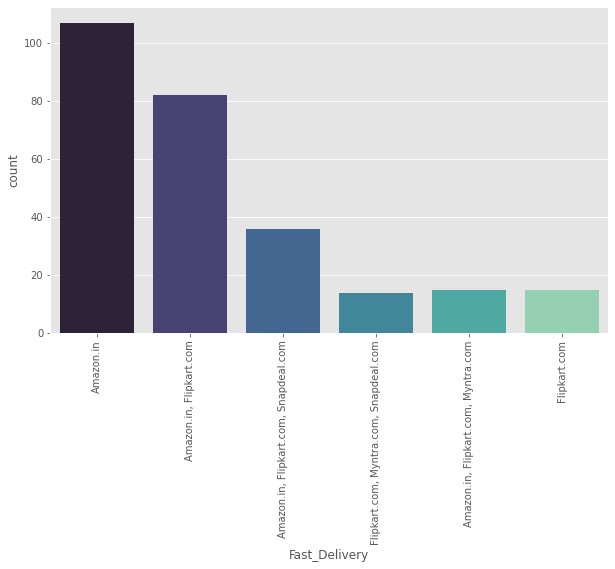

*****************************************************************************************************************************
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Flipkart.com                                                    15
Amazon.in, Paytm.com                                            15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Customer_Privacy_Info, dtype: int64


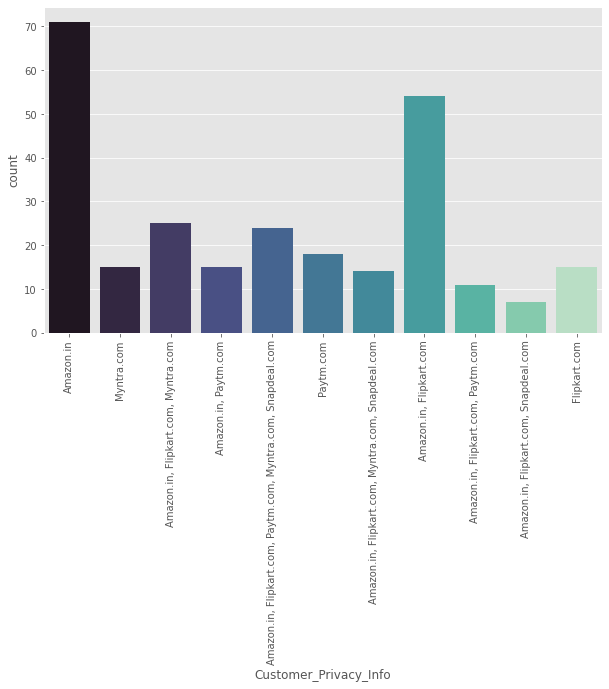

*****************************************************************************************************************************
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Financial_Security_Info, dtype: int64


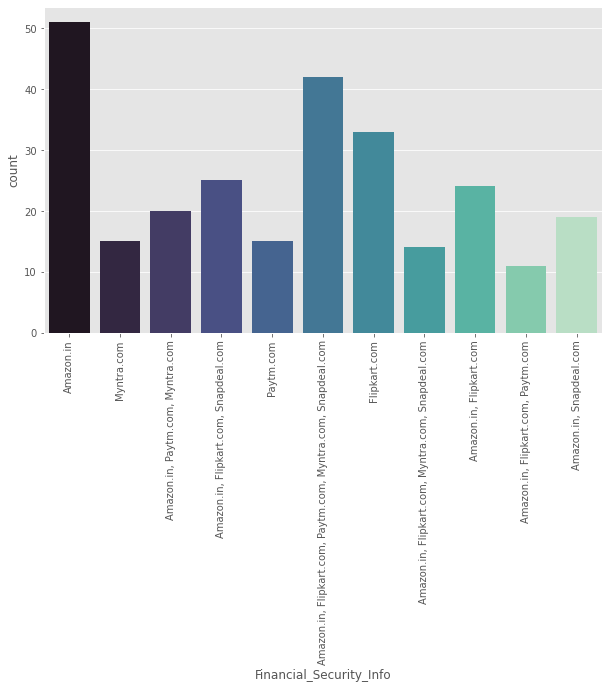

*****************************************************************************************************************************
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived_Trustworthiness, dtype: int64


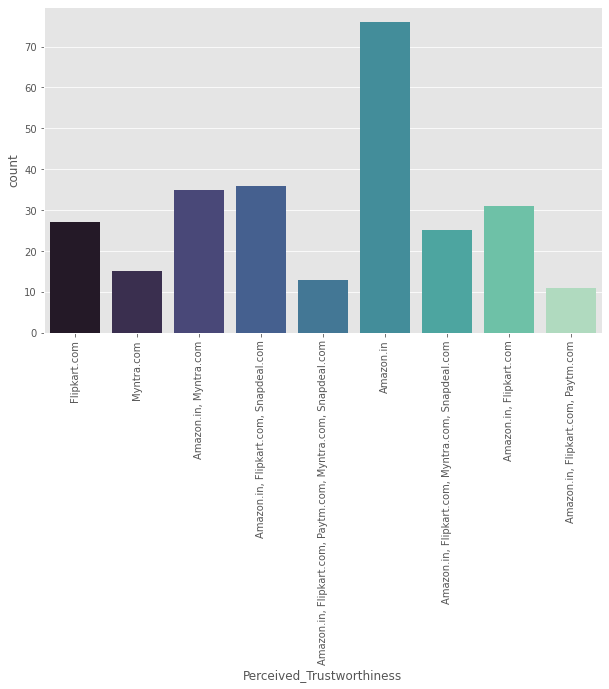

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Multichannel_Assistance, dtype: int64


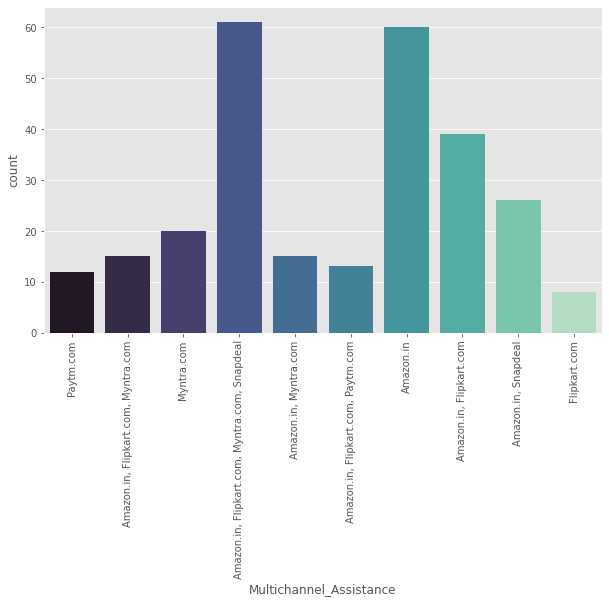

*****************************************************************************************************************************
Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Long_Login_Time, dtype: int64


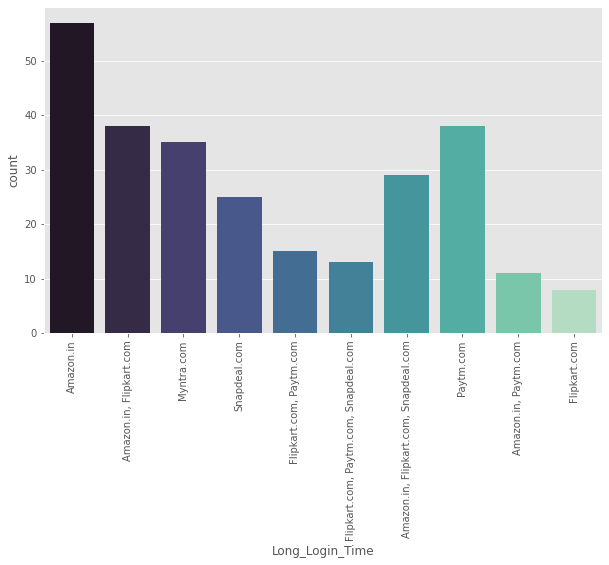

*****************************************************************************************************************************
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Long_Display_Time, dtype: int64


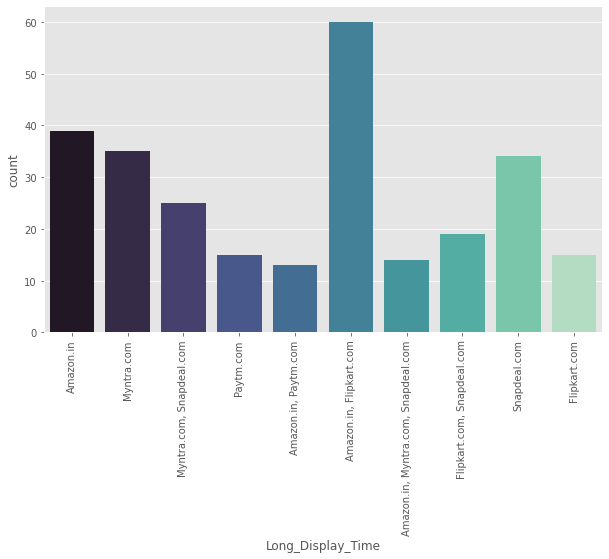

*****************************************************************************************************************************
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late_Price_Declare, dtype: int64


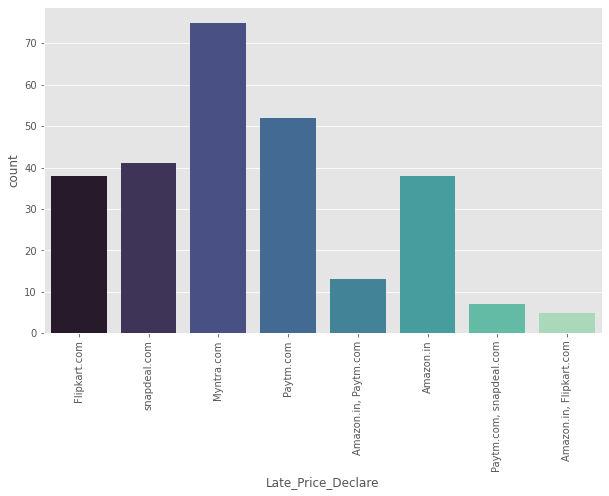

*****************************************************************************************************************************
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Long_Loading_Time, dtype: int64


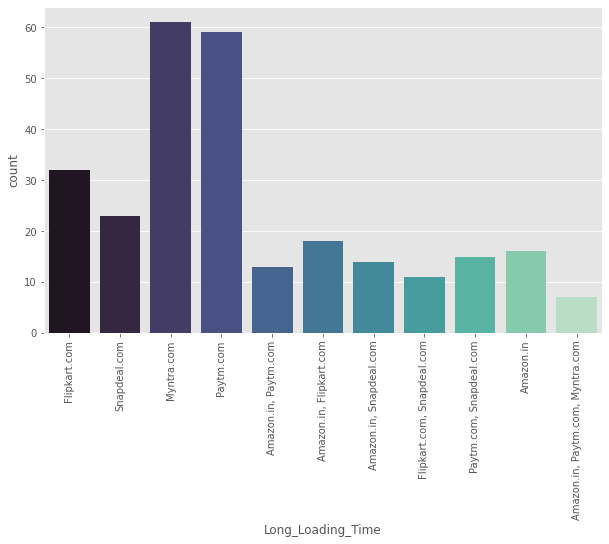

*****************************************************************************************************************************
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited_Payment_Mode, dtype: int64


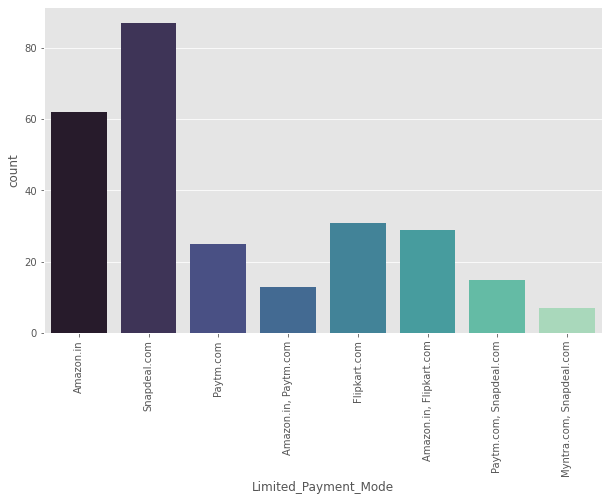

*****************************************************************************************************************************
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Late_Delivery, dtype: int64


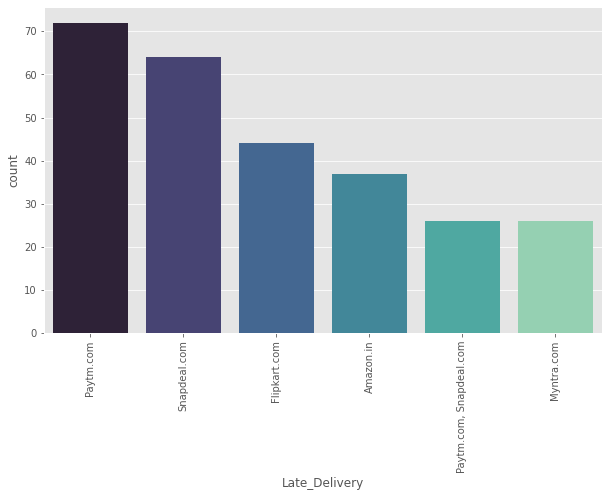

*****************************************************************************************************************************
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: WebApp_Design_Change, dtype: int64


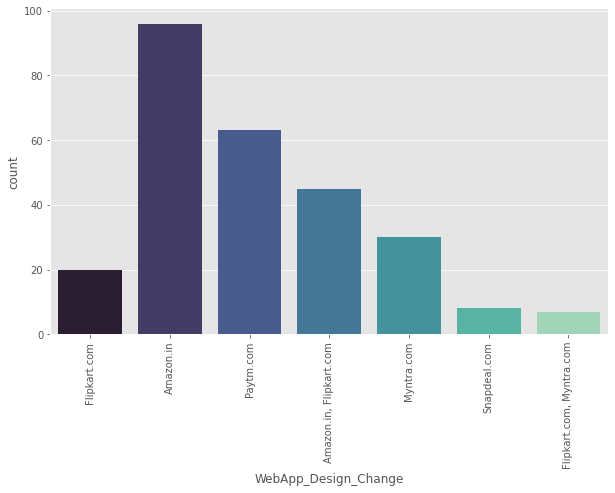

*****************************************************************************************************************************
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Page_Disruption, dtype: int64


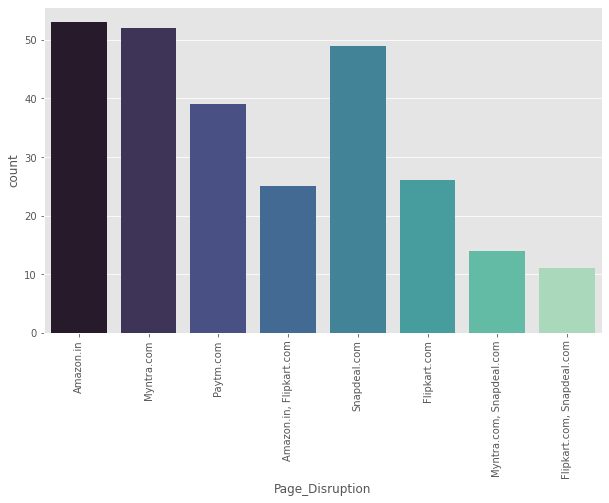

*****************************************************************************************************************************
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: WebApp_Efficiency, dtype: int64


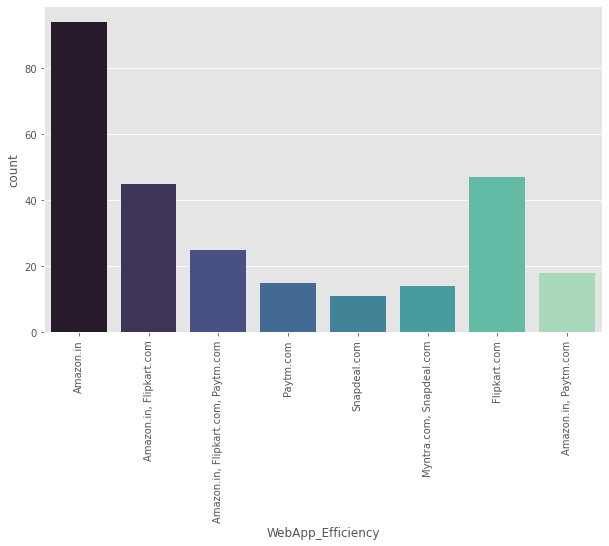

*****************************************************************************************************************************
Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Recommendation, dtype: int64


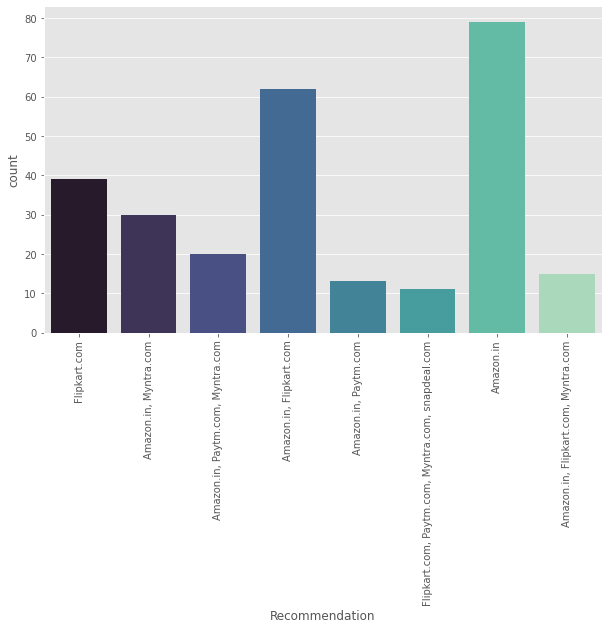

*****************************************************************************************************************************


In [44]:
df1=df.iloc[:,[2,4,5,7,8,10,12,13,15,16,17,18,19,20,21,22,23,25,26,28,31,38,39,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
for i in df1:
    print(df1[i].value_counts())
    value_count(i)

Most of the customers from the city Delhi, Greater Noida, Noida and Bangalore are used to shop onine and the shopping count is high in these cities.

Most of the customers found shopping online for more than 4 years and the count is high for the same followed by the customers shopping for 2-3 years.

In last 1 year, most of the customers were purchased online less than 10 times and only few of the customers purchased online 21-30 times.

Most of the customers used Smartphone device to access the online shopping and only few customers used Tablet to access the online shopping.

The count is high for others mobile screen size followed by 5.5 inches screen size and 5 inches screen size has least count. That means, the customers who have thier mobile screen size other than mentioned inches shopped more online followed by 5.5 inches and the customers having mobile screen size 5 inches shopped very less.

Most of the customers used Google chrome to access the website and only few of the customers used Opera and Mozilla Firefox to access the online shopping website.

Most of the customers used Search Engine and Via application to reach the online retail store after their first visit and also some customers used Detect URL to reach the online store. Which means these customers have downloaded their most favourite application to reach the online stores easily.

Many customers took more than 15 mins before making the purchase decision and some of the customers explored 6-10 mins.
Most of the customers abandoned their shopping cart sometimes and some of the customers abandoned their shopping cart frequently.

Around 133 customers abandoned their bag due to some better alternative offer and 54 customers abandoned due to promo code not applicable.

Around 90% of the customers agreed that the content on the website is easy to read and understand.

# Bivariant Analysis

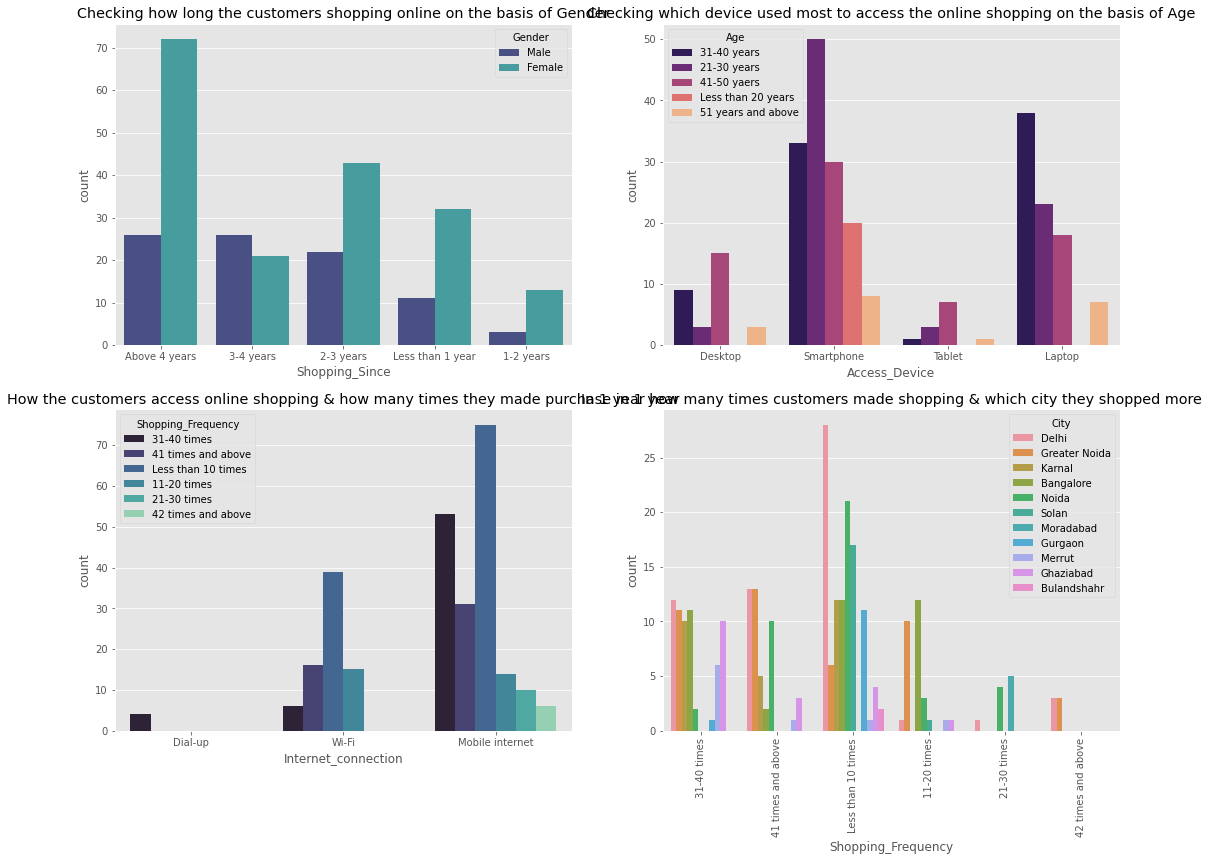

In [49]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Checking how long the customers shopping online on the basis of Gender')
sns.countplot(df['Shopping_Since'],hue=df['Gender'],palette="mako");

plt.subplot(2,2,2)
plt.title('Checking which device used most to access the online shopping on the basis of Age')
sns.countplot(df['Access_Device'],hue=df['Age'],palette="magma");

plt.subplot(2,2,3)
plt.title('How the customers access online shopping & how many times they made purchase in 1 year')
sns.countplot(df['Internet_connection'],hue=df['Shopping_Frequency'],palette="mako");

plt.subplot(2,2,4)
plt.title('In 1 year how many times customers made shopping & which city they shopped more')
sns.countplot(df['Shopping_Frequency'],hue=df['City']);

plt.xticks(rotation=90)
plt.subplot(2,2,3).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="City");
plt.show()

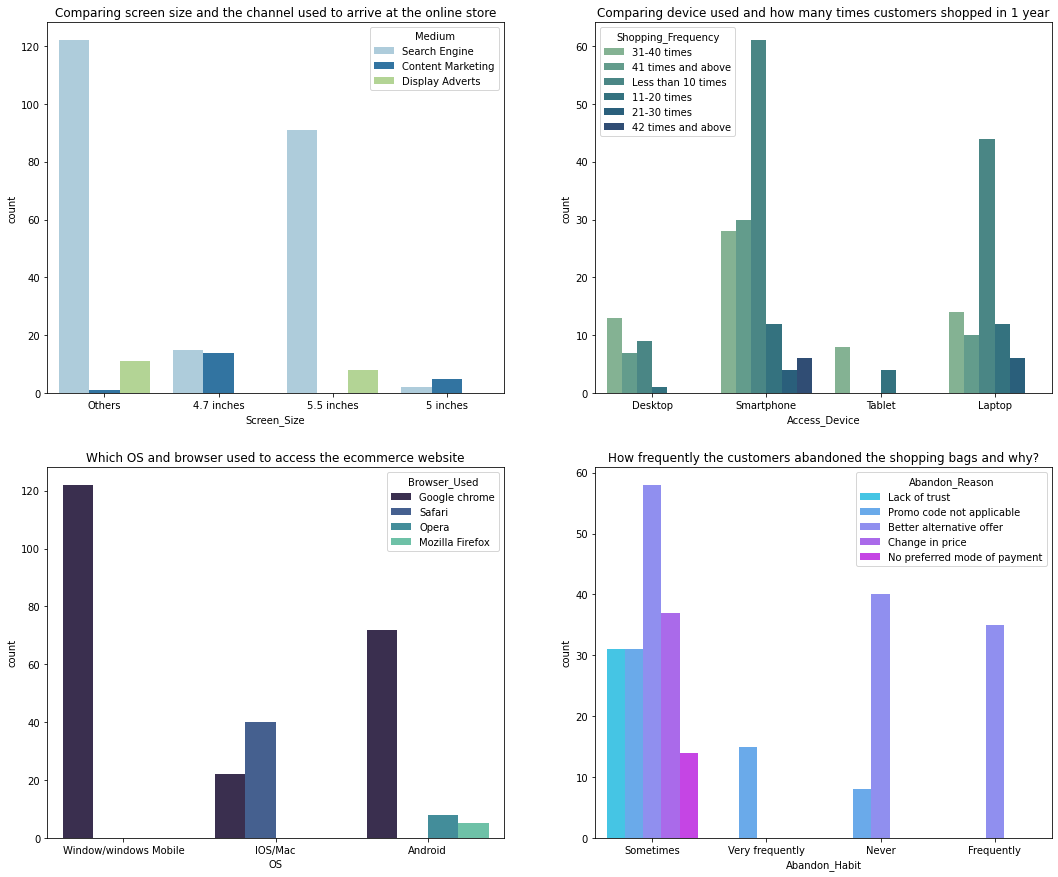

In [56]:
plt.figure(figsize=[18,15])

plt.subplot(2,2,1)
plt.title('Comparing screen size and the channel used to arrive at the online store',fontsize=12)
sns.countplot(df['Screen_Size'],hue=df['Medium'],palette="Paired");

plt.subplot(2,2,2)
plt.title('Comparing device used and how many times customers shopped in 1 year',fontsize=12)
sns.countplot(df['Access_Device'],hue=df['Shopping_Frequency'],palette="crest");

plt.subplot(2,2,3)
plt.title('Which OS and browser used to access the ecommerce website',fontsize=12)
sns.countplot(df['OS'],hue=df['Browser_Used'],palette="mako");

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags and why?',fontsize=12)
sns.countplot(df['Abandon_Habit'],hue=df['Abandon_Reason'],palette="cool");

plt.subplot(2,2,2).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Abandon_Reason");
plt.show()

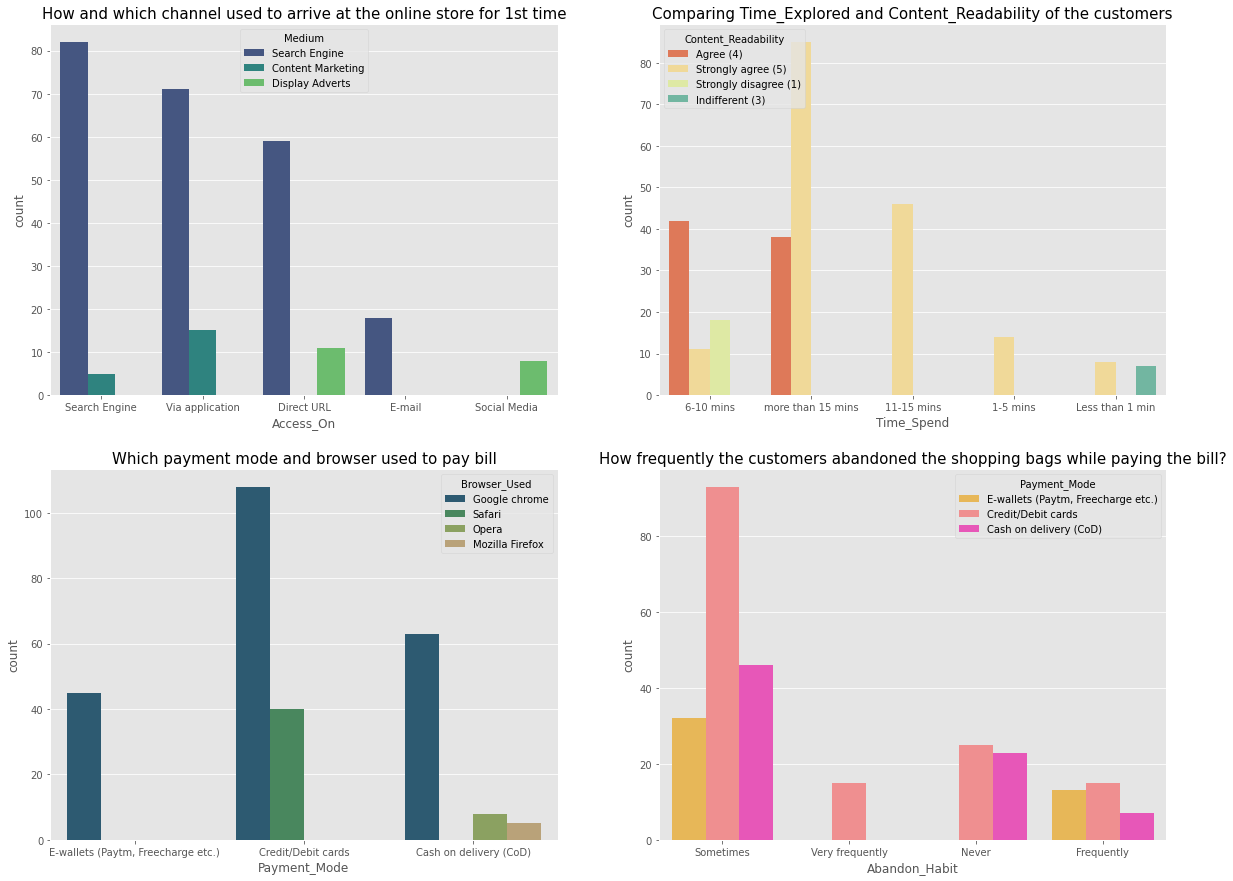

In [65]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('How and which channel used to arrive at the online store for 1st time',fontsize=15)
sns.countplot('Access_On',hue='Medium',palette="viridis",data=df);

plt.subplot(2,2,2)
plt.title('Comparing Time_Explored and Content_Readability of the customers',fontsize=15)
sns.countplot('Time_Spend',hue='Content_Readability',palette="Spectral",data=df);

plt.subplot(2,2,3)
plt.title('Which payment mode and browser used to pay bill',fontsize=15)
sns.countplot('Payment_Mode',hue='Browser_Used',palette="gist_earth",data=df);

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags while paying the bill?',fontsize=15)
sns.countplot('Abandon_Habit',hue='Payment_Mode',palette="spring_r",data=df);

plt.show()

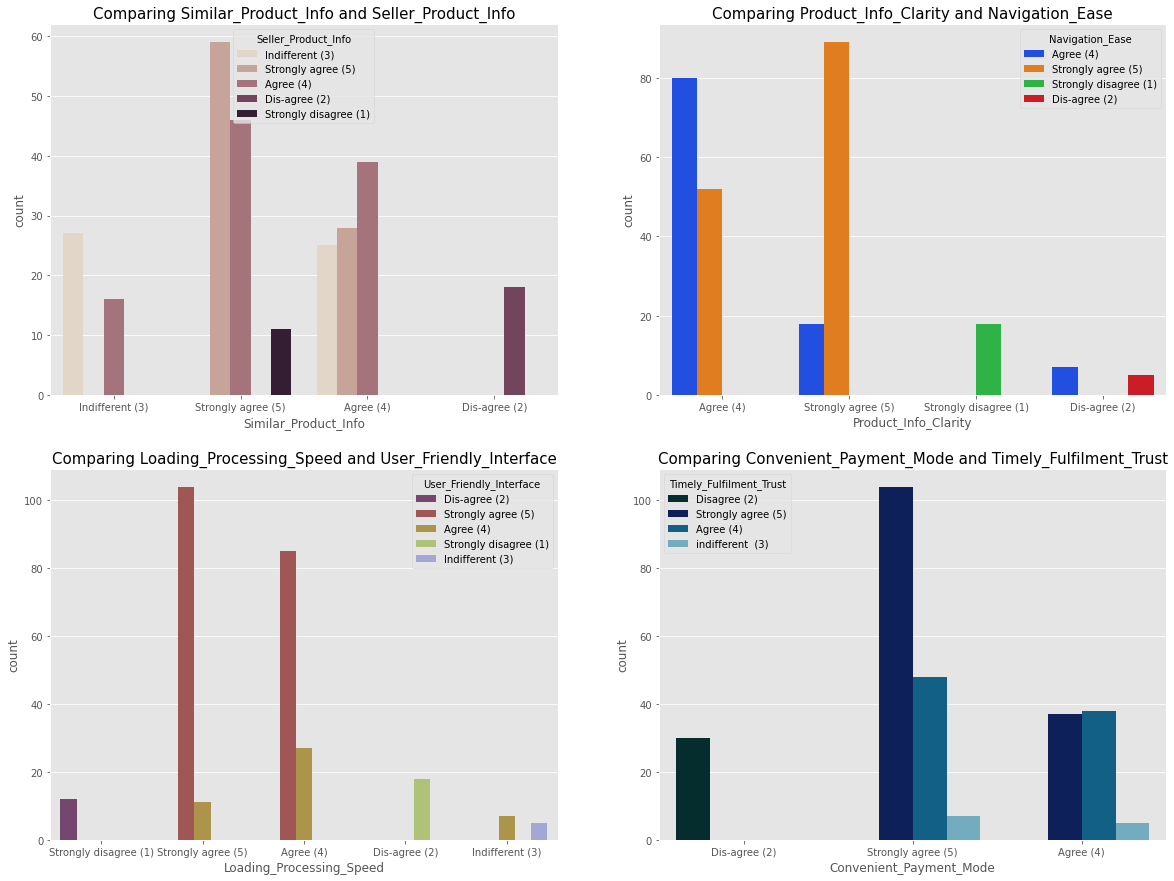

In [66]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Comparing Similar_Product_Info and Seller_Product_Info',fontsize=15)
sns.countplot(df['Similar_Product_Info'],hue=df['Seller_Product_Info'],palette="ch:.25");

plt.subplot(2,2,2)
plt.title('Comparing Product_Info_Clarity and Navigation_Ease',fontsize=15)
sns.countplot(df['Product_Info_Clarity'],hue=df['Navigation_Ease'],palette="bright");

plt.subplot(2,2,3)
plt.title('Comparing Loading_Processing_Speed and User_Friendly_Interface',fontsize=15)
sns.countplot(df['Loading_Processing_Speed'],hue=df['User_Friendly_Interface'],palette="tab20b_r");

plt.subplot(2,2,4)
plt.title('Comparing Convenient_Payment_Mode and Timely_Fulfilment_Trust',fontsize=15)
sns.countplot(df['Convenient_Payment_Mode'],hue=df['Timely_Fulfilment_Trust'],palette="ocean");

plt.subplot(2,2,4).legend(loc ="upper left",title="Timely_Fulfilment_Trust");
plt.show()

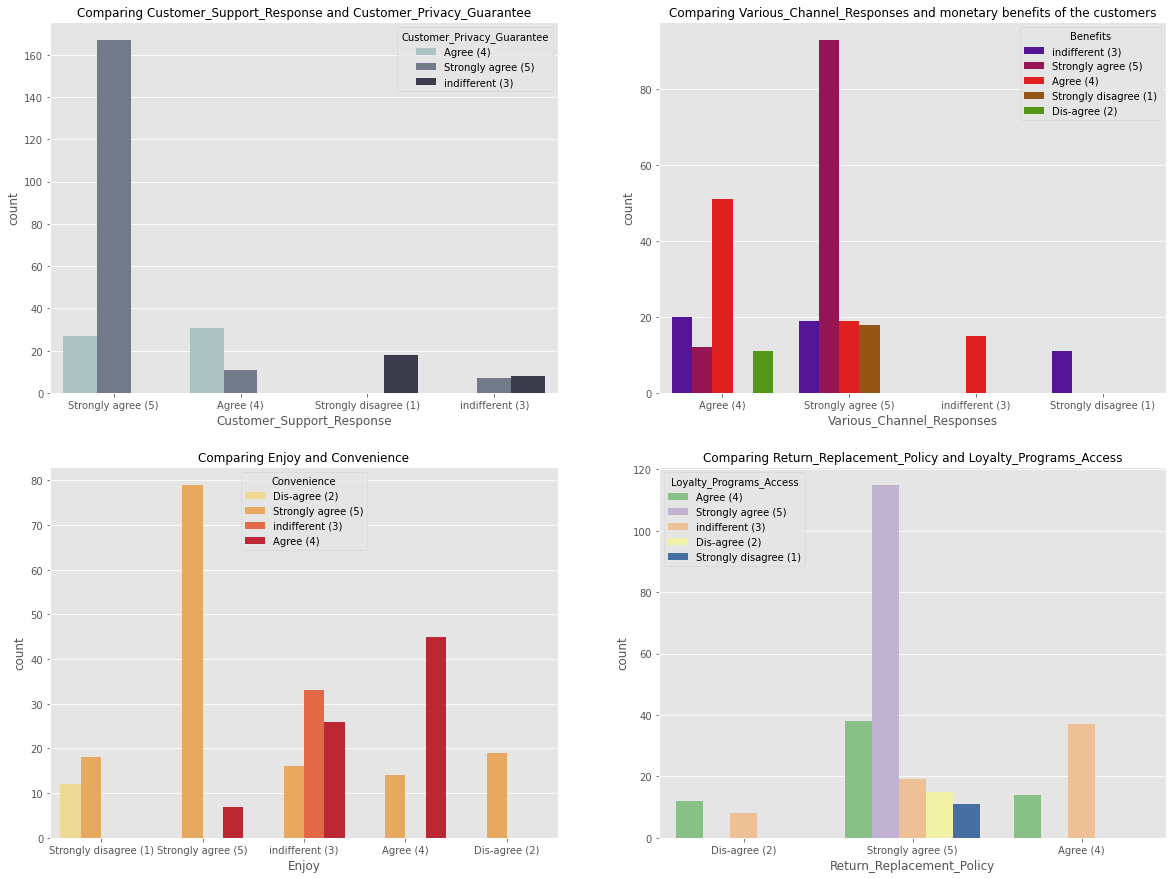

In [76]:
# Comparision between two variables
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Comparing Customer_Support_Response and Customer_Privacy_Guarantee',fontsize=12)
sns.countplot(df['Customer_Support_Response'],hue=df['Customer_Privacy_Guarantee'],palette="bone_r");

plt.subplot(2,2,2)
plt.title('Comparing Various_Channel_Responses and monetary benefits of the customers',fontsize=12)
sns.countplot(df['Various_Channel_Responses'],hue=df['Benefits'],palette="brg");

plt.subplot(2,2,3)
plt.title('Comparing Enjoy and Convenience',fontsize=12)
sns.countplot(df['Enjoy'],hue=df['Convenience'],palette="YlOrRd");

plt.subplot(2,2,4)
plt.title('Comparing Return_Replacement_Policy and Loyalty_Programs_Access',fontsize=12)
sns.countplot(df['Return_Replacement_Policy'],hue=df['Loyalty_Programs_Access'],palette="Accent");

plt.subplot(2,2,2).legend(loc ="upper right",title="Benefits");
plt.subplot(2,2,4).legend(loc ="upper left",title="Loyalty_Programs_Access");

plt.show()

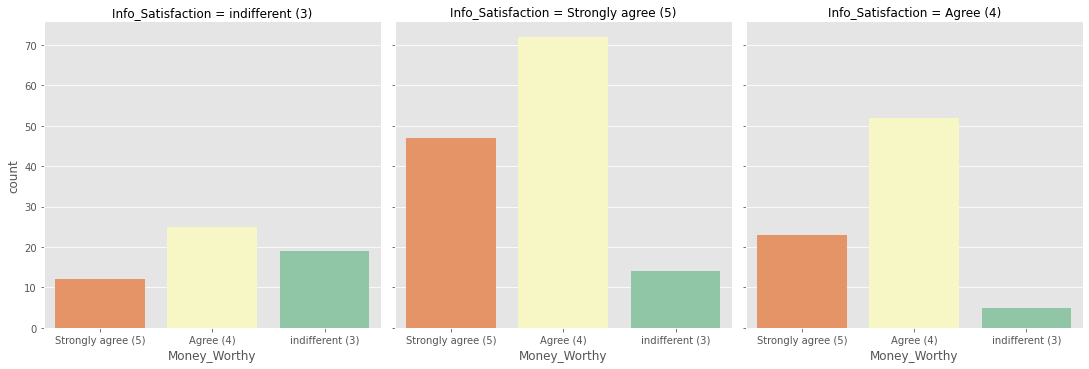

In [82]:
# Checking whether the customers getting value for money spent while shopping online after getting information about the product
sns.factorplot(x='Money_Worthy',col='Info_Satisfaction',data=df,palette="Spectral",kind="count")
plt.show()

let's see the customer feedbacks on different e-commerce sites.

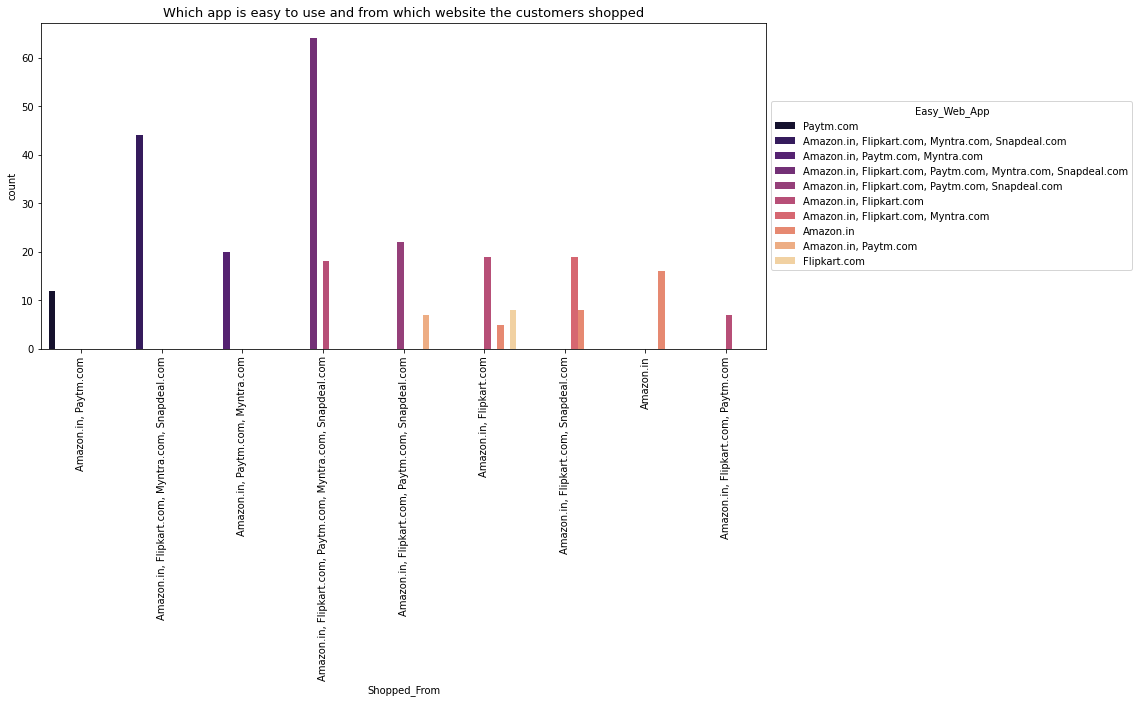

In [21]:
# lets check review of customers on bases of Easy to use website or application
plt.figure(figsize=[13,6])
plt.title('Which app is easy to use and from which website the customers shopped',fontsize=13)
sns.countplot(x='Shopped_From',hue='Easy_Web_App',palette="magma",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Easy_Web_App")

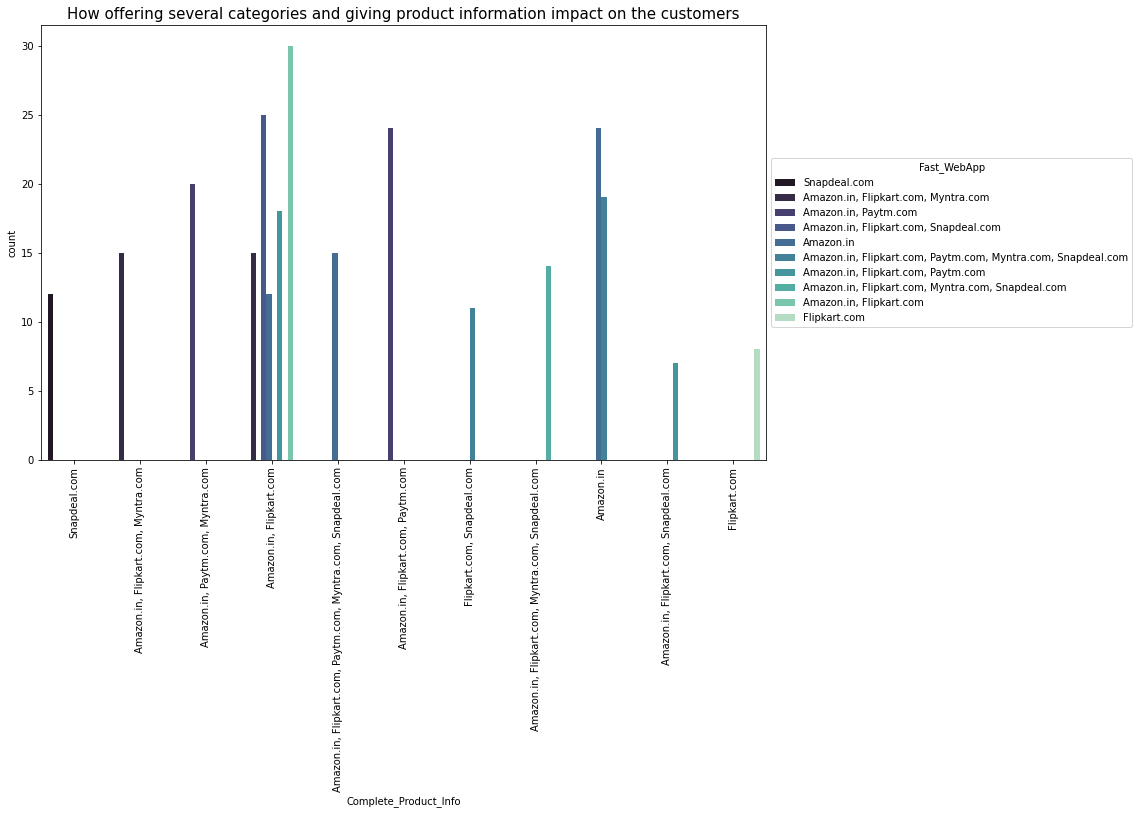

In [28]:
# lets check review of customers on bases of several categories and giving product information
plt.figure(figsize=(13,8))
plt.title('How offering several categories and giving product information impact on the customers',fontsize=15)
sns.countplot(x='Complete_Product_Info',hue='Fast_WebApp',palette="mako",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Fast_WebApp")
plt.show()

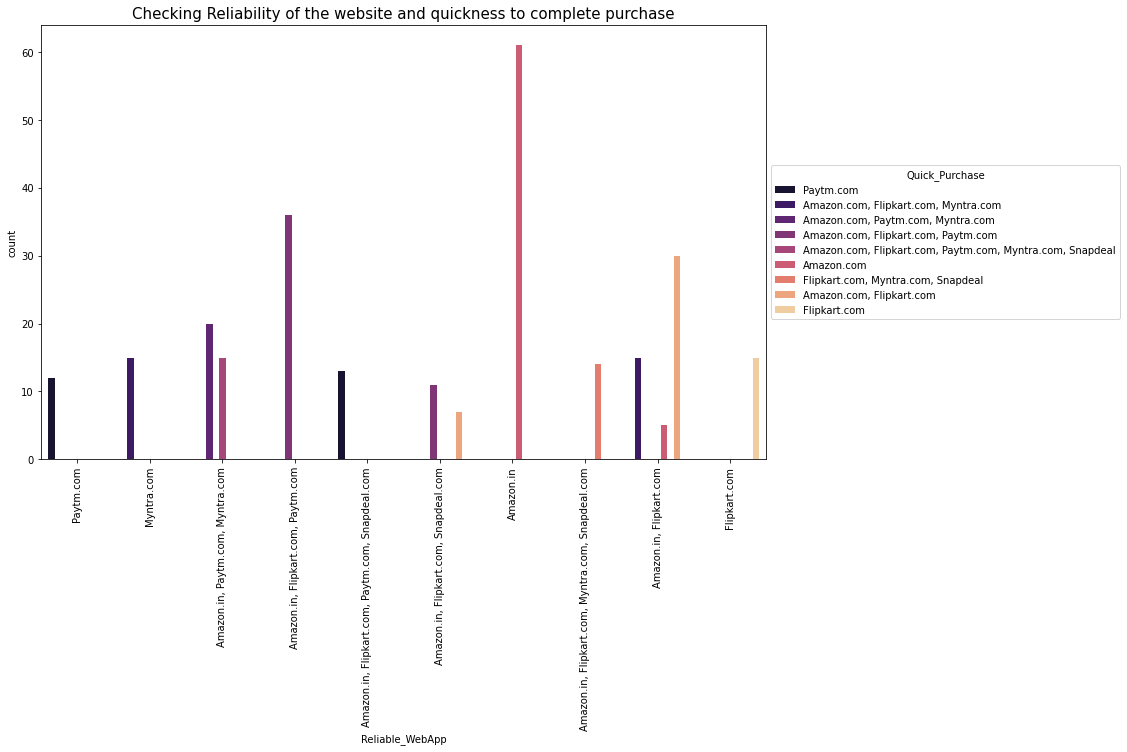

In [27]:
# lets check review of customers on bases of  Reliability and quickness to complete purchase
plt.figure(figsize=(13,8))
plt.title('Checking Reliability of the website and quickness to complete purchase',fontsize=15)
sns.countplot(x='Reliable_WebApp',hue='Quick_Purchase',palette="magma",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Quick_Purchase")
plt.show()

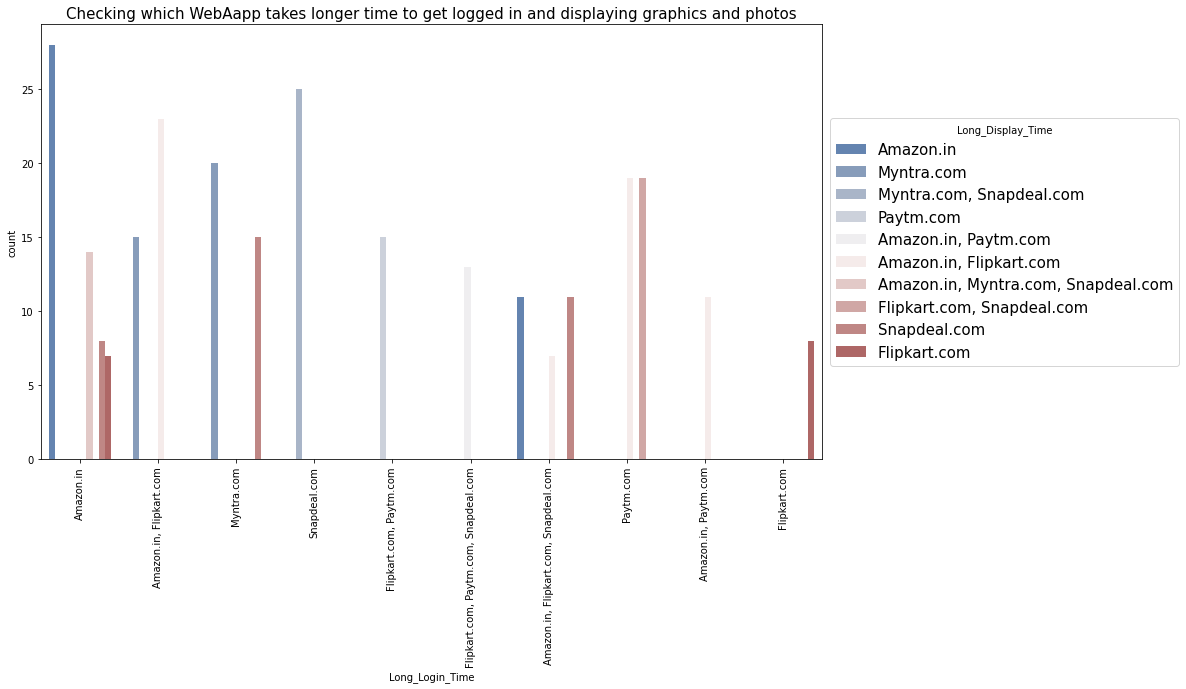

In [34]:
# lets check review of customers on bases of  Reliability and quickness to complete purchase
plt.figure(figsize=(14,8))
plt.title('Checking which WebAapp takes longer time to get logged in and displaying graphics and photos',fontsize=15)
sns.countplot(x='Long_Login_Time',hue='Long_Display_Time',palette="vlag",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Display_Time",fontsize=15)
plt.show()

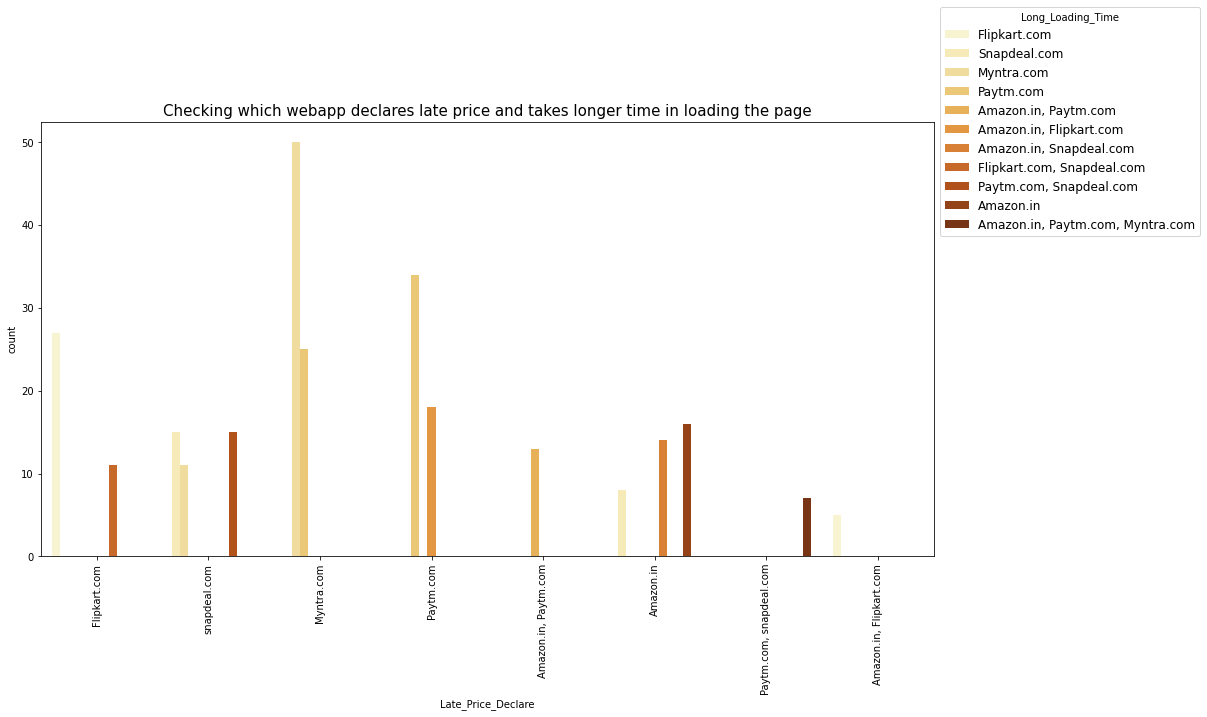

In [36]:
# lets check review of customers on bases of webapp takes time to load
plt.figure(figsize=(16,8))
plt.title('Checking which webapp declares late price and takes longer time in loading the page',fontsize=15)
sns.countplot(x='Late_Price_Declare',hue='Long_Loading_Time',palette="YlOrBr",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 1),title="Long_Loading_Time", fontsize=12)
plt.show()

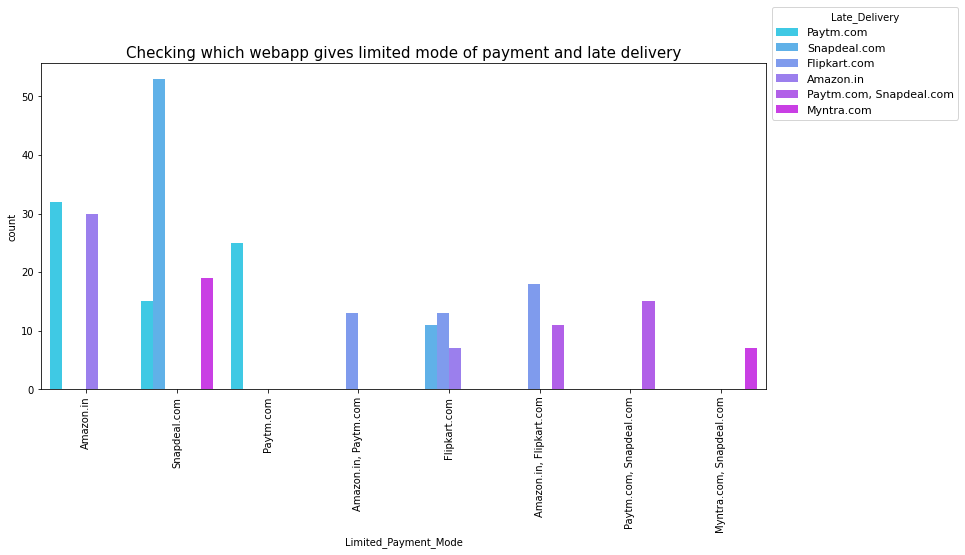

In [40]:
# lets check review of customers on bases of webapp gives limited mode of payment
plt.figure(figsize=(13,6))
plt.title('Checking which webapp gives limited mode of payment and late delivery',fontsize=15)
sns.countplot(x='Limited_Payment_Mode',hue='Late_Delivery',palette="cool",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 1),title="Late_Delivery", fontsize=11)
plt.show()

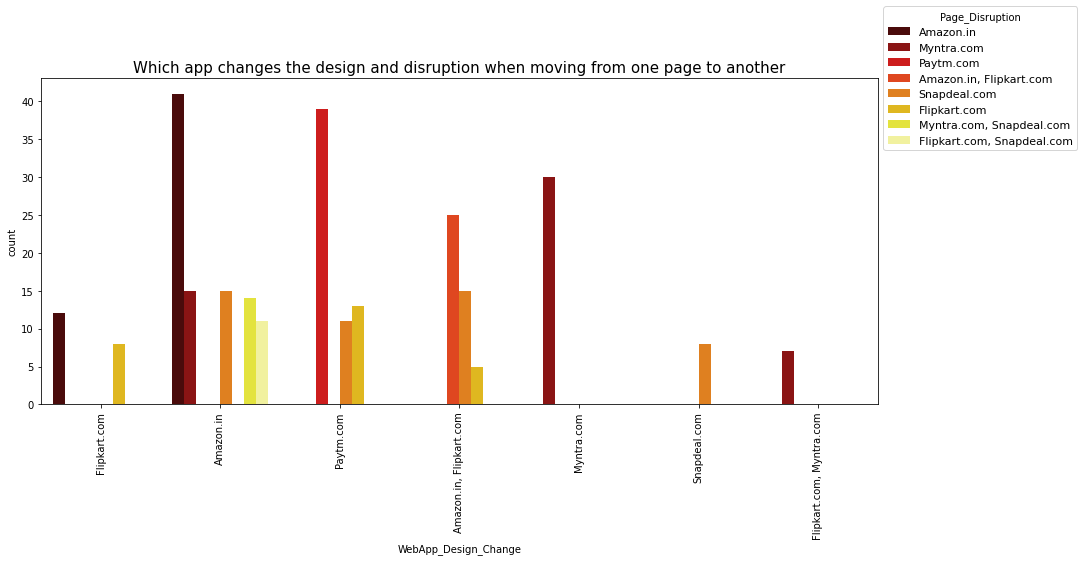

In [44]:
# lets check review of customers on bases of changes of design and disruption

plt.figure(figsize=[15,6])
plt.title('Which app changes the design and disruption when moving from one page to another',fontsize=15)
sns.countplot(x='WebApp_Design_Change',hue='Page_Disruption',palette="hot",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 1),title="Page_Disruption", fontsize=11)
plt.show()

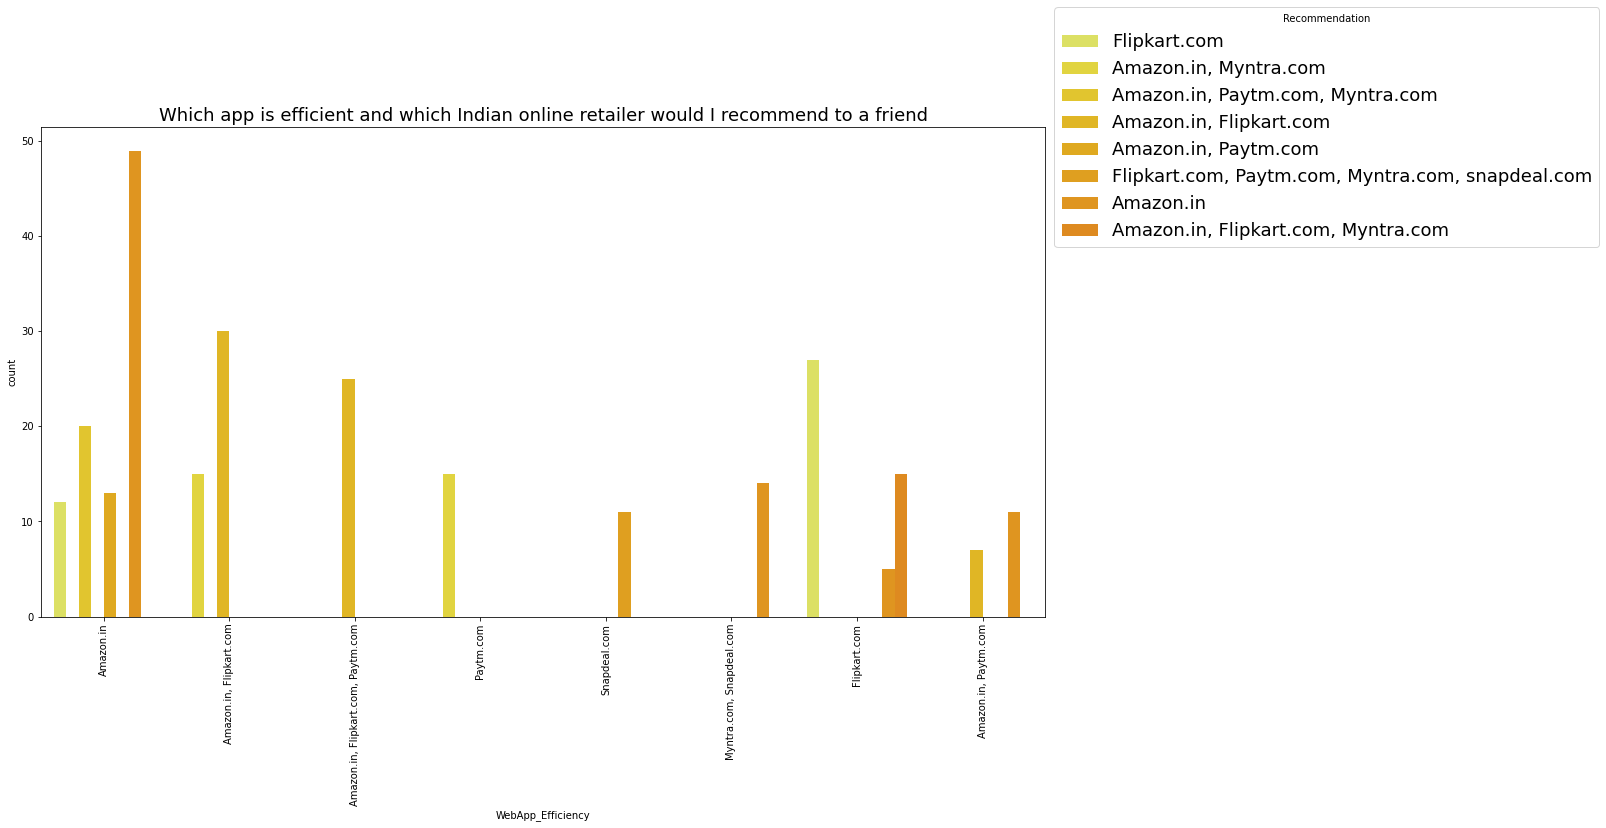

In [50]:
# lets check review of customers on bases efficiency
plt.figure(figsize=[18,9])
plt.title('Which app is efficient and which Indian online retailer would I recommend to a friend',fontsize=18)
sns.countplot(x='WebApp_Efficiency',hue='Recommendation',palette="Wistia",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 1),title="Recommendation", fontsize=18)
plt.show()

# Upshot from the data analysis

- In this project we investigated the quality of ecommerce in online businesses and created new information to understand the most important E-retail factor for customer performance and retention.

- This project aims to develop an earlier understanding of how ecommerce websites affect customer satisfaction, customer trust, and customer behavior, i.e., the purpose of re-purchase, customer loyalty, and site re-visits.

- Dimensions such as product information, easy payment mode, Trust, Fulfillment, Website design modification, security / privacy and many more have had a positive impact on ecommerce websites for customers. Also, some of the size such as easy navigation, loading and speed, late delivery etc did not affect ecommerce websites.

- Therefore, the company needs to pay attention to this size very directly and seek success that can improve its performance and quality of e-service.

- Customer satisfaction and customer trust have been seen as the result of the whole e-retail thing. Analysis results have shown that the e-retail feature has had a positive impact on customer satisfaction. Most of the research done on the e-retail factor states that customer satisfaction is the determining factor in the e-retail factor.

- It supports the idea that there is a significant relationship between e-retail factor and customer satisfaction. The E-retail factor also has a positive impact on customer loyalty. The better the e-retail factor of a company, the higher the customer trust. Providing good service quality enhances customer satisfaction and customer trust.

- From the above analysis we found that the main reasons or factors that attract consumers to shop online and then the main reasons or barriers that prevent consumers from shopping online. Therefore, in the analysis, it was found that the majority of respondents use the internet every day but most respondents do not use the internet every day to purchase products. About half of the respondents' opinions were that they would only use the internet to buy products when the need arises to do so.

# Advice to the online seller

- Product safety and consumer data security are key concerns for online customers buying online products or services. Online retailers can therefore reassure their customers by providing personal information, privacy policy and security assurance through the development of their own technology systems.

- Vendors should be aware of the annoying features of online shopping such as website inactivity, long delays in completing online orders, inconsistencies in online content, errors in filling orders, and difficulty returning items.

- Online retailers may be more concerned about delivery times, delivery charges and product return policies. They can make it easier, faster and more reliable, so that consumers can enjoy online shopping information and enjoy shopping on certain websites on a regular basis.

- Respondents assume that product mixing or finding a different product during delivery is a major obstacle to online shopping, so sellers are more careful when it comes to delivery.

- Getting feedback from customers is also an important part of improving a company’s sales. The e-tailer seeks to keep the customer happy in order to build a successful business, but easily falls into the trap of assuming that customers will provide feedback without being asked.

- If e-tailers do something wrong, most customers will not complain, they will just go elsewhere. It is therefore important to ask customers how they really feel about their services.